# Банки - Сегментация пользователей по потреблению 

#### Задача: 
    Проанализируйте клиентов регионального банка и сегментируйте пользователей по количеству потребляемых продуктов, обращая особое внимание на отток.
    
    1. Проведите исследовательский анализ данных.
    
    2. Сегментируйте пользователей на основе данных о количестве потребляемых продуктов.
    
    3. Сформулируйте и проверьте статистические гипотезы.

Проверьте гипотезу различия возраста между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним.

#### Описание данных: 
    Датасет содержит данные о клиентах банка "Метанпром". Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.
    
    Колонки: 
        userid - идентификатор пользователя
        score - баллы кредитного скоринга 
        City - город
        Gender - пол
        Age - Возраст 
        Objects - количество объектов в собственности 
        Balance - баланс на счёте
        Products - количество продуктов, которыми пользуются клиент 
        CreditCard - есть ли кредитная карта
        Loyality - активный клиент 
        estimated_salary - заработная плата клиента 
        Churn - ушёл или нет
 
 
#### План работы с данными: 
    1. Загрузка данных и библиотек 
    2. Предобработка 
    3. Исследовательский анализ данных
    4. Сегментация, описание портретов 
    5. Статистическая проврека гипотез 
    6. Выводы по рекомендации удержанию

#### Презентация:
    
    https://disk.yandex.ru/i/EtRlSBV4VIlOUw

#### Дашборд: 
    
    https://public.tableau.com/app/profile/filipp.zuevskii/viz/BankClientChurn/Sheet1?publish=yes

## Обзор данных 

Импортируем необходимые библиотеки для работы:

In [1]:
#импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats as st
import numpy as np
import math as mth


import warnings
warnings.filterwarnings('ignore')

#столбцы и строки полностью, формат округлен
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format
#вывод значений без сокращений
pd.set_option('display.max_colwidth', -1)

In [2]:
try:
    bank = pd.read_csv('bank_dataset.csv')
except:
    bank = pd.read_csv('/datasets/bank_dataset.csv')

Рассмотрим наш Датасет.

In [3]:
bank

,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,"101,348.88",1
1,15690047,608,Рыбинск,Ж,41,1,"83,807.86",1,0,1,"112,542.58",0
2,15662040,502,Ярославль,Ж,42,8,"159,660.80",3,1,0,"113,931.57",1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,"93,826.63",0
4,15780624,850,Рыбинск,Ж,43,2,"125,510.82",1,1,1,"79,084.10",0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15648965,771,Ярославль,М,39,5,NaN,2,1,0,"96,270.64",0
9996,15612628,516,Ярославль,М,35,10,"57,369.61",1,1,1,"101,699.77",0
9997,15627268,709,Ярославль,Ж,36,7,NaN,1,0,1,"42,085.58",1
9998,15725091,772,Ростов Великий,М,42,3,"75,075.31",2,1,0,"92,888.52",1


Рассматриваю типы данных:

In [4]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   City              10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Objects           10000 non-null  int64  
 6   Balance           6383 non-null   float64
 7   Products          10000 non-null  int64  
 8   CreditCard        10000 non-null  int64  
 9   Loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


Рассмотрим пропуски:

In [5]:
print('Наличие пропусков в таблице:',bank.isna().sum())

Наличие пропусков в таблице: userid              0   
score               0   
City                0   
Gender              0   
Age                 0   
Objects             0   
Balance             3617
Products            0   
CreditCard          0   
Loyalty             0   
estimated_salary    0   
Churn               0   
dtype: int64


### Выводы по первому разделу:
    1. В нашем Датасете представлено 10000 строк с данными клиентов банка, а так же таблица содержит 12 столбцов:
    userid - Идентификатор пользователя 
    score - Баллы кредитного скоринга 
    City - Город
    Age - Возраст 
    Objects - Количество объектов в сообственности 
    Balance - Остаток денежных средств на счете 
    Product - Количетсво продуктов, которыми пользуется клиент 
    CreditCard - Есть ли кредитная карта
    Loyality - Активный клиент
    estimated_salary - заработная плата клиента банка
    Churn - Признак оттока 
    
    2. В столбце Balance, мы можем заметить пропуски в количестве 3617. Исследую пропуски в разрезе остальных признаков, выдвину причины их появления.
    
    На этапе предобработки внесем следующие изменения:
    
    1. Приведем к хорошему стилю, заменим прописные буквы в названиях на строчные, а так же приведем к snacke_case.
    2. Заменим значения столбца Gender с "Ж" на 0, "М" н 1. 
    3. Проверим на дубликаты.
    4. В следующих столбцах CreditCard,Loyality, Churn изменим тип данных на Булевой.

Приступаю к предобработке данных.

## Предобработка данных 

#### Приведение наименований столбцов файлов к единому стилю 

In [6]:
#Привожу к нижнему регистиру:
bank.columns = bank.columns.str.lower()
print(bank.columns) 

Index(['userid', 'score', 'city', 'gender', 'age', 'objects', 'balance',
       'products', 'creditcard', 'loyalty', 'estimated_salary', 'churn'],
      dtype='object')


In [7]:
#Snacke_case:
bank = bank.rename(columns={'userid':'user_id', 'creditcard':'credit_card'})
print(bank.columns)

Index(['user_id', 'score', 'city', 'gender', 'age', 'objects', 'balance',
       'products', 'credit_card', 'loyalty', 'estimated_salary', 'churn'],
      dtype='object')


#### Вывод 

Наименования столбцов приведены к общему стилю 

In [8]:
bank = pd.get_dummies(bank, columns=['gender'],drop_first = True)

In [9]:
bank = bank.join(pd.get_dummies(bank.city))

In [10]:
bank.head(5)

,user_id,score,city,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,gender_М,Ростов Великий,Рыбинск,Ярославль
0,15677338,619,Ярославль,42,2,NaN,1,1,1,"101,348.88",1,0,0,0,1
1,15690047,608,Рыбинск,41,1,"83,807.86",1,0,1,"112,542.58",0,0,0,1,0
2,15662040,502,Ярославль,42,8,"159,660.80",3,1,0,"113,931.57",1,0,0,0,1
3,15744090,699,Ярославль,39,1,NaN,2,0,0,"93,826.63",0,0,0,0,1
4,15780624,850,Рыбинск,43,2,"125,510.82",1,1,1,"79,084.10",0,0,0,1,0


##### Анализ пропусков столбца Balance:

Пропусков достаточно много, поэтому удалить их будет некорректно:

In [11]:
bank.query('balance.isna()')

,user_id,score,city,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,gender_М,Ростов Великий,Рыбинск,Ярославль
0,15677338,619,Ярославль,42,2,NaN,1,1,1,"101,348.88",1,0,0,0,1
3,15744090,699,Ярославль,39,1,NaN,2,0,0,"93,826.63",0,0,0,0,1
6,15635267,822,Ярославль,50,7,NaN,2,1,1,"10,062.80",0,1,0,0,1
11,15779909,497,Рыбинск,24,3,NaN,2,1,0,"76,390.01",0,1,0,1,0
12,15675000,476,Ярославль,34,10,NaN,2,1,0,"26,260.98",0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,15648358,841,Рыбинск,28,4,NaN,2,1,1,"179,436.60",0,1,0,1,0
9992,15699841,726,Рыбинск,36,2,NaN,1,1,0,"195,192.40",0,1,0,1,0
9994,15762030,800,Ярославль,29,2,NaN,2,0,0,"167,773.55",0,0,0,0,1
9995,15648965,771,Ярославль,39,5,NaN,2,1,0,"96,270.64",0,1,0,0,1


In [12]:
#создаю столбец, с пропусками
bank['balance_nan'] = np.where(bank['balance']>=0,'1','0')


In [13]:
bank['balance_nan'].astype('bool')

0       True
1       True
2       True
3       True
4       True
        ... 
9995    True
9996    True
9997    True
9998    True
9999    True
Name: balance_nan, Length: 10000, dtype: bool

Осуществлю проверку датафрейма на скрытые дубликаты.

In [14]:
### КОД РЕВЬЮЕРА
bank[bank.duplicated(subset=bank.columns.difference(['user_id','estimated_salary']),keep=False)]

,user_id,score,city,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,gender_М,Ростов Великий,Рыбинск,Ярославль,balance_nan
2758,15711083,624,Ярославль,36,6,NaN,2,0,0,"84,635.64",0,1,0,0,1,0
5411,15856376,642,Ярославль,40,7,NaN,2,1,0,"10,712.82",0,0,0,0,1,0
7899,15726296,642,Ярославль,40,7,NaN,2,1,0,"183,963.34",0,0,0,0,1,0
8857,15853562,624,Ярославль,36,6,NaN,2,0,0,"84,749.96",0,1,0,0,1,0


In [15]:
#сгруппирую строки с пропусками по значениям оттока 0|1
bank.query('balance.isna()').groupby('churn')['churn'].count()

churn
0    3117
1    500 
Name: churn, dtype: int64

In [16]:
#средний остаток по признаку оттока 
bank.groupby('churn').agg({'balance':['count','mean']})

balance           
        count       mean
churn                   
0      4846   119,535.86
1      1537   120,746.97

Мы можем заметить, что в строках значений есть клиенты как ушедшие, так и оставшиеся в банке, а наличие/отсутсвие остатка не связано churn=1, то есть пропуск не является признаком оттока.

In [17]:
#Рассмотрим есть ли нулевые остатки в поле 'Balance'
bank.query('balance == 0')

,user_id,score,city,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,gender_М,Ростов Великий,Рыбинск,Ярославль,balance_nan


Нулевых остатков в датасете нет.

In [18]:
#Рассмотрю распеделение признаков у клиентов Ростов со значением churn

In [19]:
bank.query('city == "Ростов Великий" and churn == 1')

,user_id,score,city,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,gender_М,Ростов Великий,Рыбинск,Ярославль,balance_nan
7,15698884,376,Ростов Великий,29,4,"115,046.74",4,1,0,"119,346.88",1,0,1,0,0,1
16,15780188,653,Ростов Великий,58,1,"132,602.88",1,1,0,"5,097.67",1,1,1,0,0,1
46,15645016,829,Ростов Великий,27,9,"112,045.67",1,1,1,"119,708.21",1,0,1,0,0,1
47,15814309,637,Ростов Великий,39,9,"137,843.80",1,1,1,"117,622.80",1,0,1,0,0,1
53,15745034,655,Ростов Великий,41,8,"125,561.97",1,0,0,"164,040.94",1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9960,15723762,795,Ростов Великий,33,9,"104,552.72",1,1,1,"120,853.83",1,0,1,0,0,1
9975,15709031,610,Ростов Великий,50,1,"113,957.01",2,1,0,"196,526.55",1,1,1,0,0,1
9981,15715490,498,Ростов Великий,42,3,"152,039.70",1,1,1,"53,445.17",1,1,1,0,0,1
9982,15810899,655,Ростов Великий,46,7,"137,145.12",1,1,0,"115,146.40",1,0,1,0,0,1


Привожу столбцы 'credit_card','loyalty','churn' к булевому типу

In [20]:
bank['credit_card'] = bank['credit_card'].astype('bool')
bank['loyalty'] = bank['loyalty'].astype('bool')
bank['churn'] = bank['churn'].astype('bool')

In [21]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   city              10000 non-null  object 
 3   age               10000 non-null  int64  
 4   objects           10000 non-null  int64  
 5   balance           6383 non-null   float64
 6   products          10000 non-null  int64  
 7   credit_card       10000 non-null  bool   
 8   loyalty           10000 non-null  bool   
 9   estimated_salary  10000 non-null  float64
 10  churn             10000 non-null  bool   
 11  gender_М          10000 non-null  uint8  
 12  Ростов Великий    10000 non-null  uint8  
 13  Рыбинск           10000 non-null  uint8  
 14  Ярославль         10000 non-null  uint8  
 15  balance_nan       10000 non-null  object 
dtypes: bool(3), float64(2), int64(5), object(

Проверка столбцов, 'churn','products','credit_card','balance'.

In [22]:
#Соотношение признака оттока и остатка на счете 
bank[['churn','balance']].query('churn==1 and balance > 0' )

,churn,balance
2,True,"159,660.80"
5,True,"113,755.78"
7,True,"115,046.74"
16,True,"132,602.88"
35,True,"134,264.04"
...,...,...
9975,True,"113,957.01"
9981,True,"152,039.70"
9982,True,"137,145.12"
9991,True,"88,381.21"


Отток сочетается с остатком на балансе клиента. Таких клиентов мы можем увидеть 1,5 тысячи, это не случайность. 
Могу предположить, что остаток на счете и признак оттока не связаны между собой, возможно отток касается использованием клиента других продуктов банка, к которым заказчик не относит остаток на текущем счету.

In [23]:
bank[['products', 'credit_card', 'balance']].query('credit_card==1 and products == 1 and balance > 0')

,products,credit_card,balance
4,1,True,"125,510.82"
9,1,True,"134,603.88"
16,1,True,"132,602.88"
26,1,True,"136,815.64"
28,1,True,"141,349.43"
...,...,...,...
9990,1,True,"35,016.60"
9991,1,True,"88,381.21"
9993,1,True,"155,060.41"
9996,1,True,"57,369.61"


Если у человека есть кредитная карта и остаток на балансе, это означает то что он пользуются 2 продуктами. Но в столбце Product отображено что клиент пользуется 1 продуктом, и таких клиентов почти 3 человек, случайность - исключена.


Проверяю данные на дубликаты, уберу из проверки поле user_id, вероятней всего присвоено автоматически:

In [24]:
#проверка на дубликаты:
print(
    'Количество дубликатов:', 
    bank.drop('user_id', axis=1, inplace=False).duplicated().sum()
     )        

Количество дубликатов: 0


Дубликаты отсутсвуют.

Посмотрим на результат преобразований:

In [25]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   city              10000 non-null  object 
 3   age               10000 non-null  int64  
 4   objects           10000 non-null  int64  
 5   balance           6383 non-null   float64
 6   products          10000 non-null  int64  
 7   credit_card       10000 non-null  bool   
 8   loyalty           10000 non-null  bool   
 9   estimated_salary  10000 non-null  float64
 10  churn             10000 non-null  bool   
 11  gender_М          10000 non-null  uint8  
 12  Ростов Великий    10000 non-null  uint8  
 13  Рыбинск           10000 non-null  uint8  
 14  Ярославль         10000 non-null  uint8  
 15  balance_nan       10000 non-null  object 
dtypes: bool(3), float64(2), int64(5), object(

<div class="alert alert-success"><b>Комментарий ревьюера&nbsp;<big>✔️</big></b></div>

### Вывод по разделу:
На основе полученных данных мы можем сказать, что:
   
   1. Пропуски не связаны с признаком оттока, т.e присутствуют и у ушедших и тех кто пользуется продуктами банка.
   2. У клиентов с признаком оттока существуют остатки на счетах.
   3. Отсутсвие заивисимости наличия пропуска от какого либо другого признака.
   4. Пропуски в данных есть только в записях клиентов Филиала Рыбинска и Ярославля.
   
   Пропуски данных поля balance, оставлю как есть, иначе их удаление повлияет на дальнейшее исследование.
   
По итогам предобработки данных было сделано:
   1. Наименование столбцов приведены к общему стилю.
   2. Проведена замена значений gender с "М" на 1 и с "Ж" на 0.
   3. Пропуски оставлены, как есть.



## Исследовательский анализ данных (EDA)


### Общее распределение признаков клиентов банка.

Рассмотрим наш датасет и общее распределение признаков:

In [26]:
bank.describe()

,user_id,score,age,objects,balance,products,estimated_salary,gender_М,Ростов Великий,Рыбинск,Ярославль
count,"10,000.00","10,000.00","10,000.00","10,000.00","6,383.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00"
mean,"15,733,676.57",650.53,38.92,5.01,"119,827.49",1.53,"100,090.24",0.55,0.25,0.25,0.50
std,"71,936.19",96.65,10.49,2.89,"30,095.06",0.58,"57,510.49",0.50,0.43,0.43,0.50
min,"15,608,437.00",350.00,18.00,0.00,"3,768.69",1.00,11.58,0.00,0.00,0.00,0.00
25%,"15,671,264.25",584.00,32.00,3.00,"100,181.98",1.00,"51,002.11",0.00,0.00,0.00,0.00
50%,"15,733,474.00",652.00,37.00,5.00,"119,839.69",1.00,"100,193.91",1.00,0.00,0.00,1.00
75%,"15,795,969.75",718.00,44.00,7.00,"139,512.29",2.00,"149,388.25",1.00,1.00,0.00,1.00
max,"15,858,426.00",850.00,92.00,10.00,"250,898.09",4.00,"199,992.48",1.00,1.00,1.00,1.00


In [27]:
#функция для формирования графиков распределения:
#data - датафрейм, на основе которого строится распределение
#hue- признак, по которому мы хотим увидеть детализацию данных

def tables(data, hue=None):
    #дискретные значения
    for column in ['city','gender_М', 'credit_card', 'loyalty', 'objects', 'products', 'churn']:
        ax = sns.countplot(data=data, x=column, hue=hue);
        plt.title(f'Распределение клиентов по признаку {column}', fontsize = 16, color = 'black')
        plt.show()
    
    plt.figure(figsize=(16,7))
    sns.countplot(data=data, x='age', hue=hue);
    plt.title('Распределение клиентов по признаку age', fontsize = 16, color = 'black')
    plt.show()

    #непрерывные значения
    for column in ['score',  'balance', 'estimated_salary','age']:
        sns.kdeplot(data=data, x=column, hue=hue,common_norm=False);
        plt.title(f'Распределение клиентов по признаку {column}', fontsize = 16, color = 'black')
        plt.show()

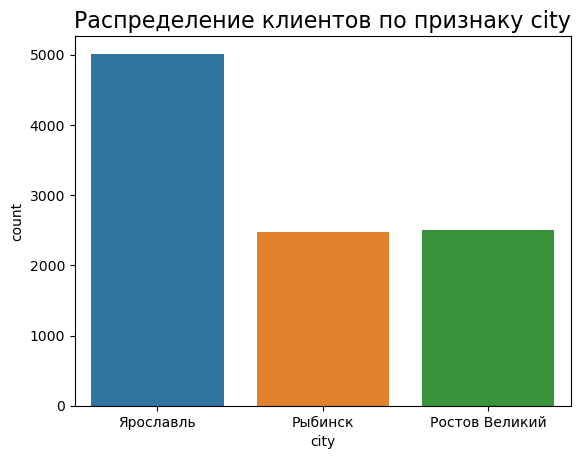

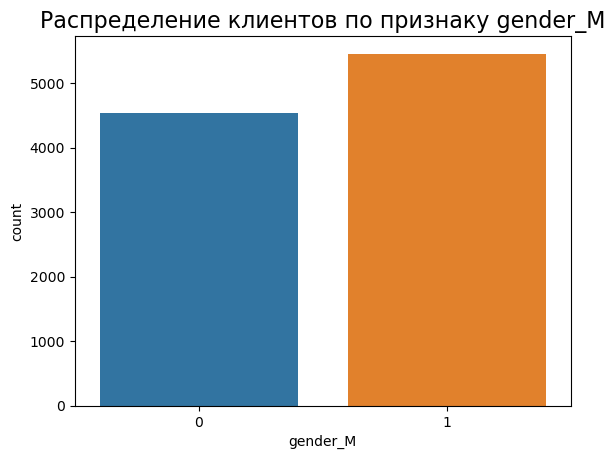

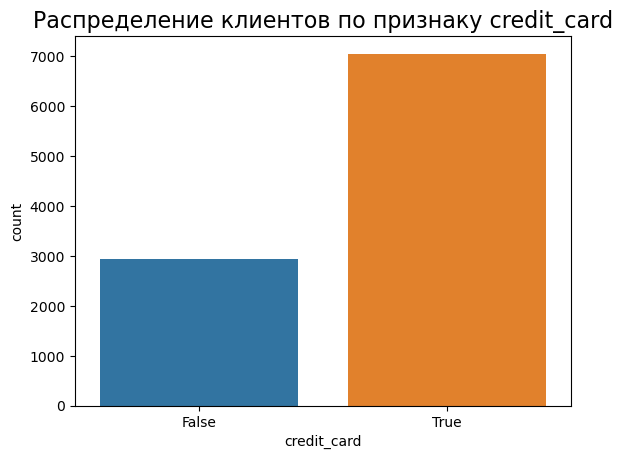

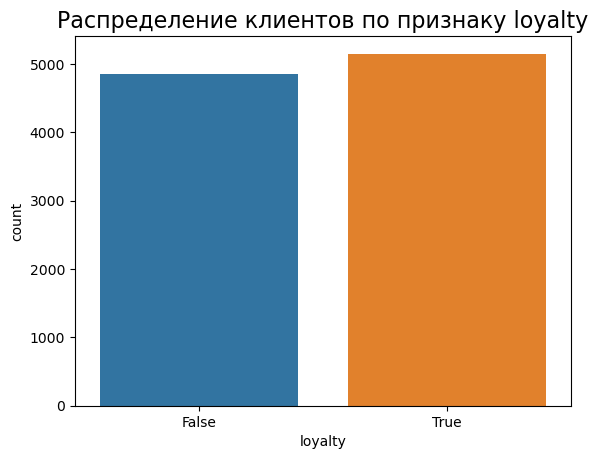

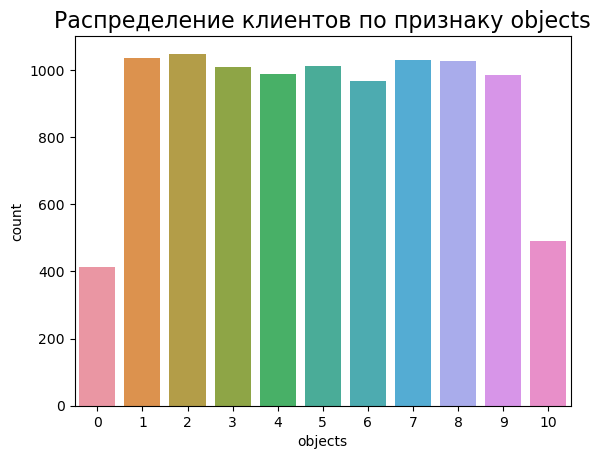

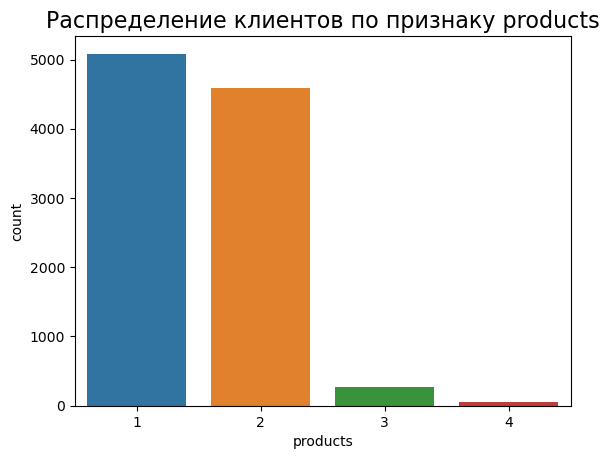

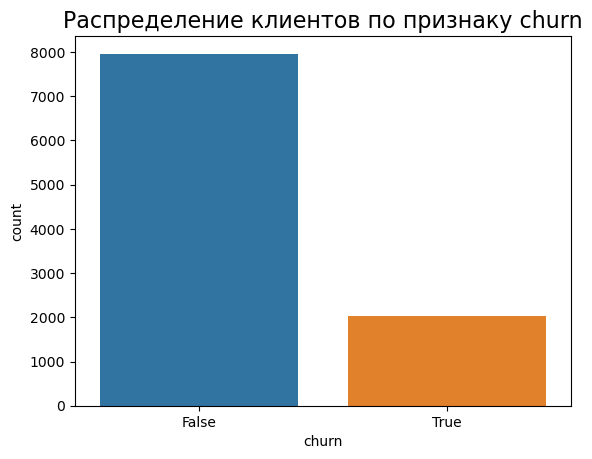

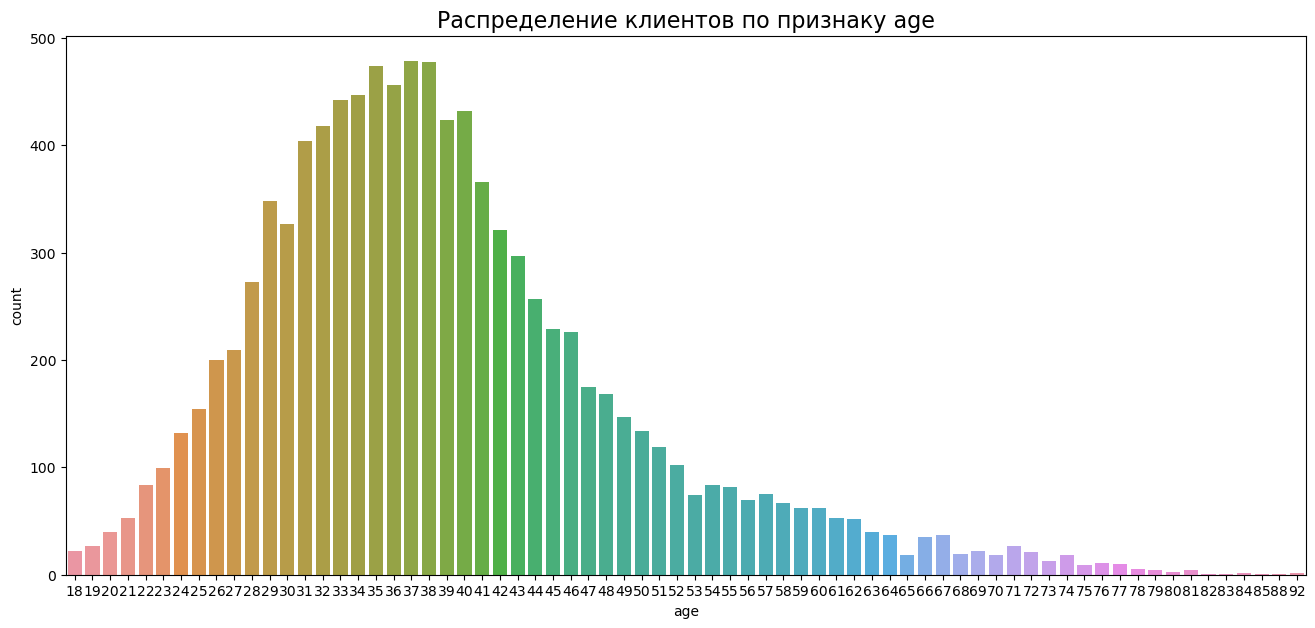

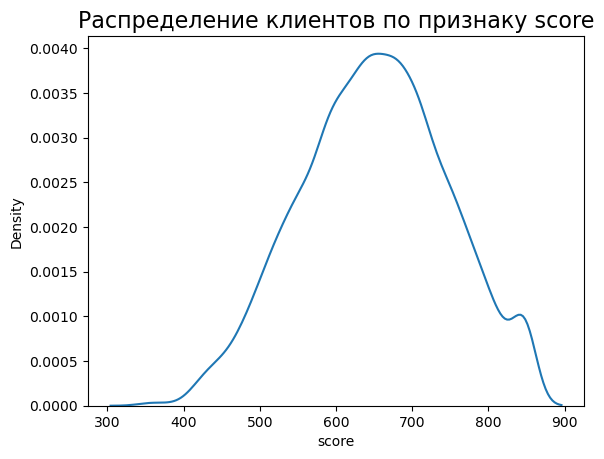

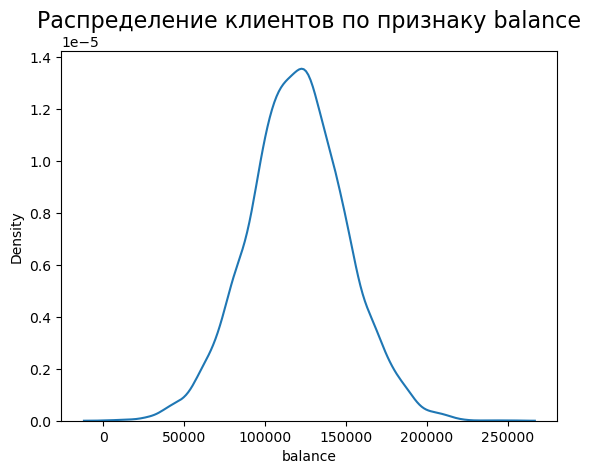

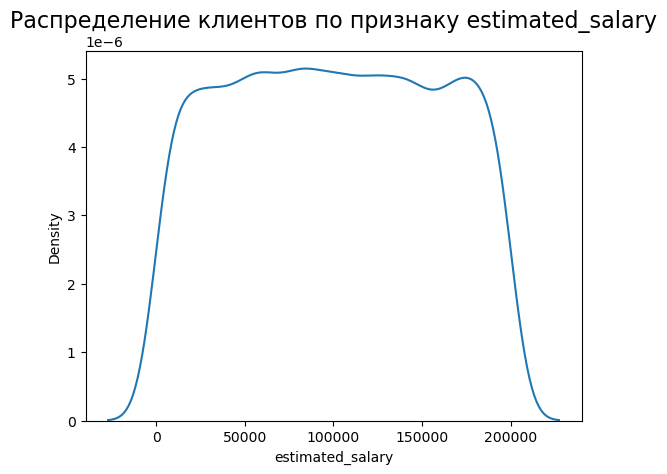

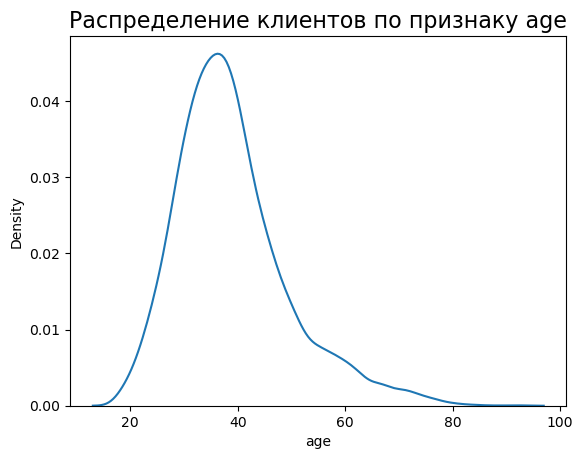

In [28]:
tables(bank, hue=None)

Мы можем заметить странное распеределение столбцов objects и estimated_salary:
    
    Небольшие значения практически отсутсвуют, в середине распределение большое плато. 
    
    Если мы рассмотрим распределение клиентов по количеству сообственности у клиента от 0 до 10. 

In [29]:
ob = bank.groupby('objects')['objects'].count().to_frame()
ob.columns = ['objects_cnt']
ob['percent'] = ob['objects_cnt'] / ob['objects_cnt'].sum()
ob

,objects_cnt,percent
objects,,
0,413,0.04
1,1035,0.10
2,1048,0.10
3,1009,0.10
4,989,0.10
5,1012,0.10
6,967,0.10
7,1028,0.10
8,1025,0.10


#### Вывод;


Самый большой филиал находится в Ярославле (5 тыс.клиентов), в Рыбинске и Ростове в 2 раза меньше.
    
    По полученным данным мы можем составить портрет клиента банка: 
    1. Возраст составляет от 37-38 лет.
    2. Владелеет 5 объектами недвижимости.
    3. Средний остаток на счете 120.000 рублей.
    4. Средний доход 100.000 рублей.
    5. Пользуется 1-2 продуктами, в большинстве случаев 2 продукт - кредитная карта.
    6. Клиент активный, если судить по медианне значения лояльности.

Клиенты банка уходят от нас c вероятностью 20%. Это очень большой процент оттока. 


### Матрица корреляций

Рассмотрим, коррелируют ли какие либо признаки между собой:

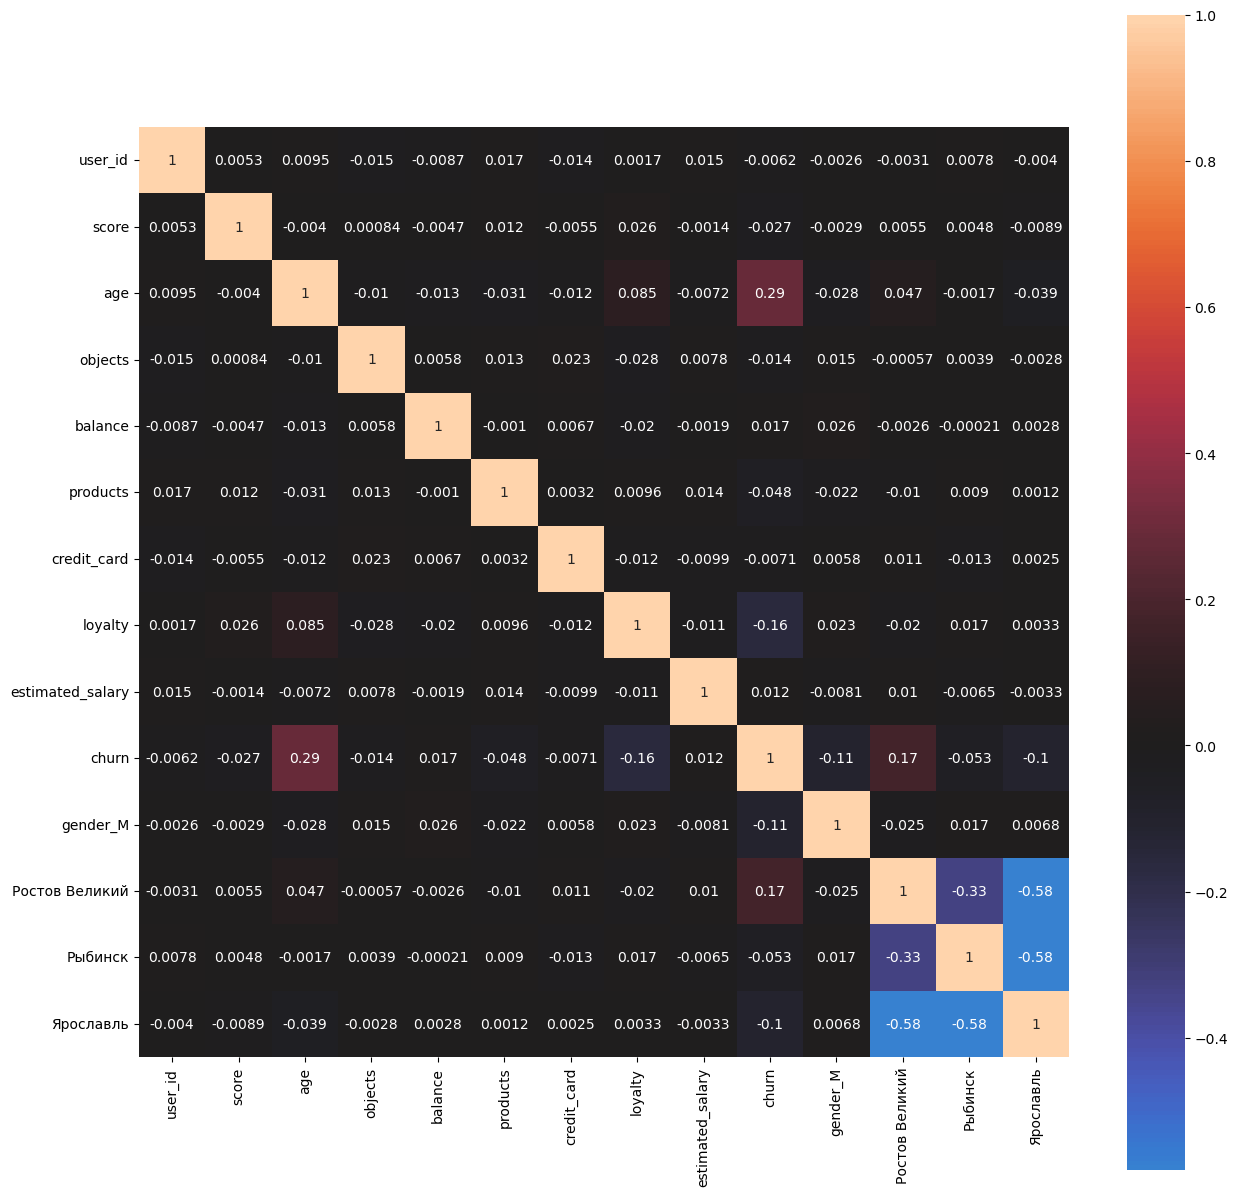

In [30]:
#построим и отрисуем матрицу корреляций
cm = bank.corr() #вычисляем матрицу корреляций

plt.figure(figsize=(15,15))
#нарисуем тепловую карту с подписями для матрицы корреляций
sns.heatmap(cm, annot=True, square=True, center=0 )

plt.show()


Изучив дополнительно корреляцию по городу и полу, можем сказать с точки зрения шкалы Чеддока, что взаимосвязи между городами и полом практически нет, значения попарной корреляции не превышают 0.29 - между оттоком и возрастом клиента, чем старше клиент, тем меньше вероятность, что он уйдет из банка: -0.16, менее активные клиенты скорее всего перестанут пользоваться услугаими банка и уйдут в "отток"

### Распределение признаков оттока клиентов:

Общее количество клиентов по признаку оттока:

In [31]:
churn_group = bank.groupby('churn')['churn'].count()
churn_group.columns = ['churn_cnt']
churn_group

churn
False    7963
True     2037
Name: churn, dtype: int64

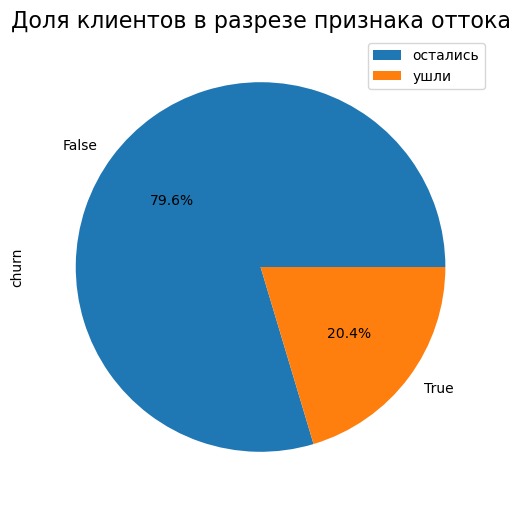

In [32]:
#Построим круговую диаграмму
churn_group.plot(kind = 'pie', y ='churn_cnt', autopct='%1.1f%%', figsize= (6,6),
                       );
plt.title('Доля клиентов в разрезе признака оттока', fontsize = 16)
plt.legend(['остались', 'ушли'])
plt.show()

Общее распределение признаков относительно признака оттока:

In [33]:
bank.groupby(['churn'])['score', 'city', 'gender_М', 'age', 'objects', 'balance',
       'products', 'credit_card', 'loyalty', 'estimated_salary', 'churn'].mean()

,score,gender_М,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
churn,,,,,,,,,,
False,651.85,0.57,37.41,5.03,"119,535.86",1.54,0.71,0.55,"99,738.39",0.00
True,645.35,0.44,44.84,4.93,"120,746.97",1.48,0.70,0.36,"101,465.68",1.00


По полученным данным сделаем следующий вывод: клиенты которые остаются с банком:
   
   В основном это мужчины их возраст меньше, чем у тех кто уходит. Активных клиентов среди них больше.
   Сумма дохода, остаток на счете, количество объектов в сообственности, использование креидтной карты, и кредитный рейтинг отличаются незначительно.

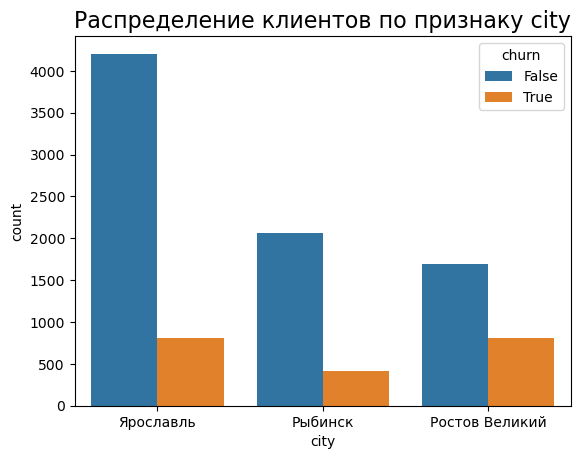

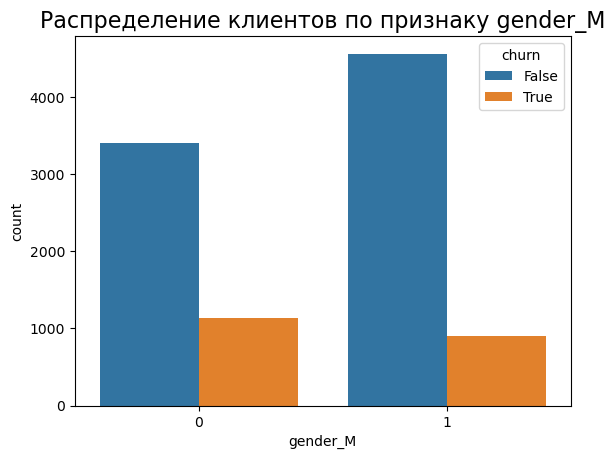

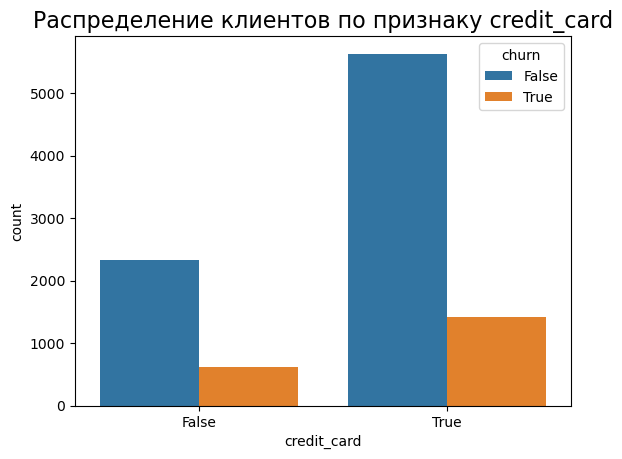

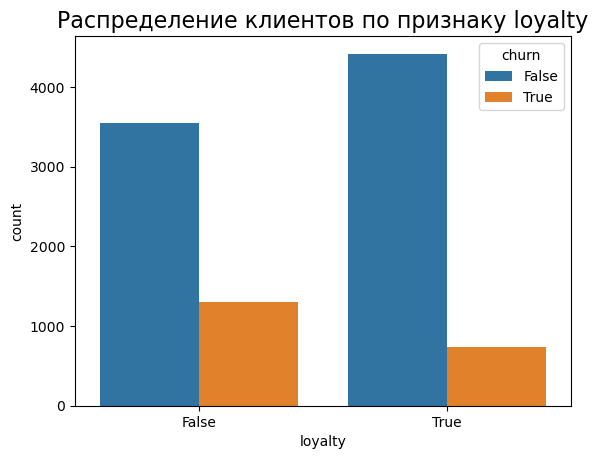

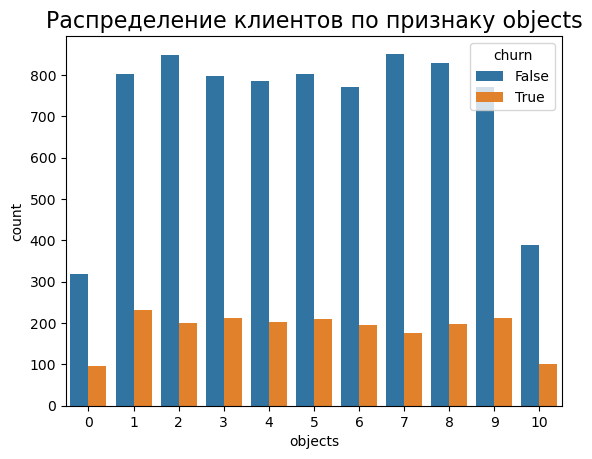

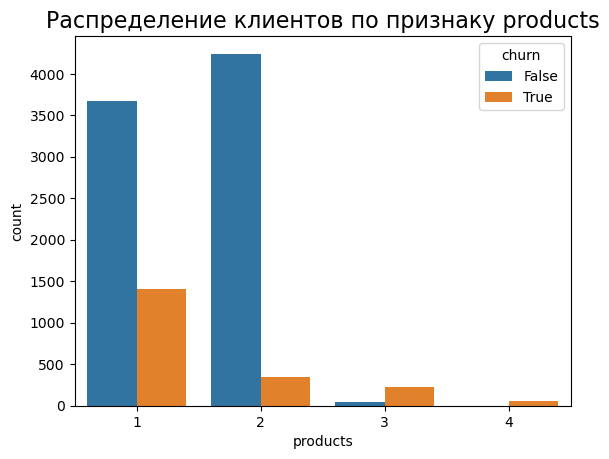

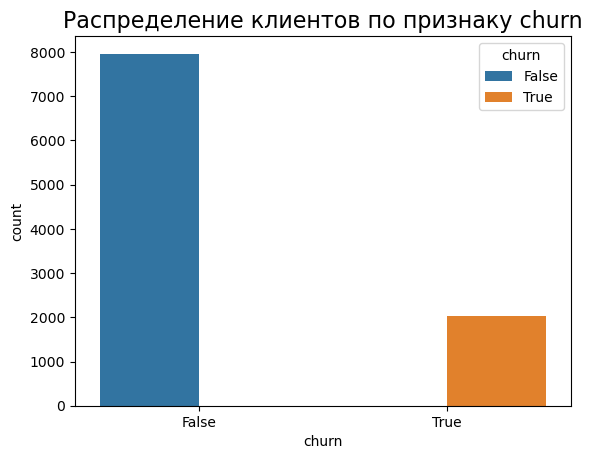

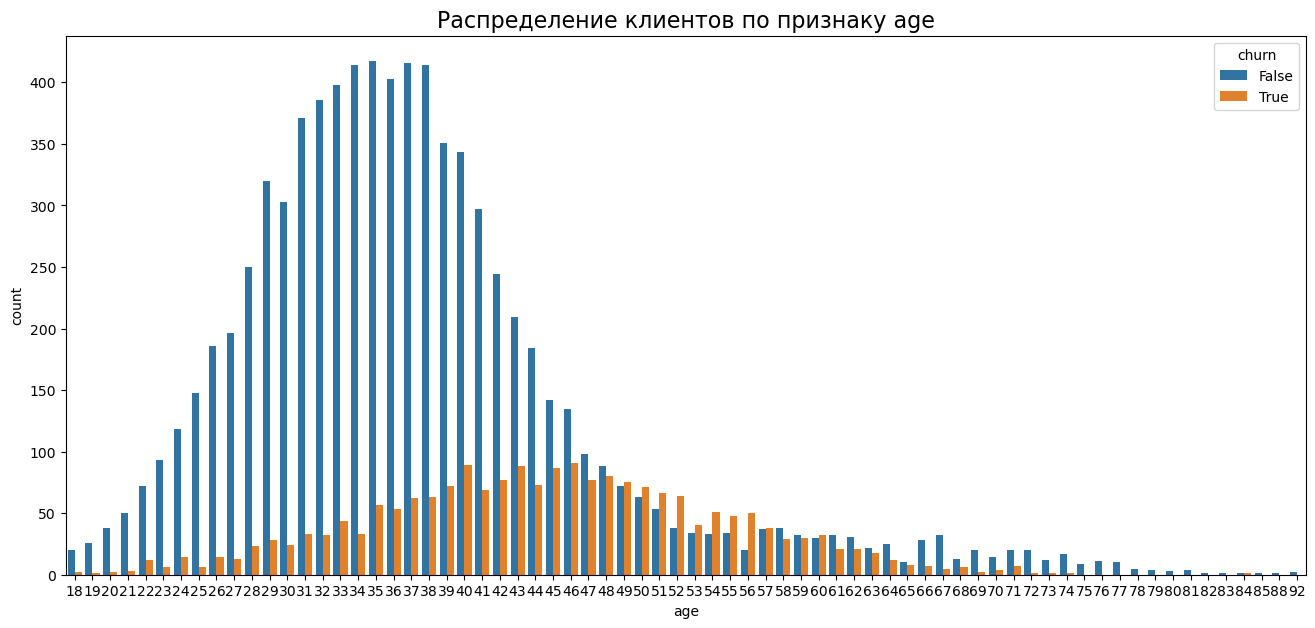

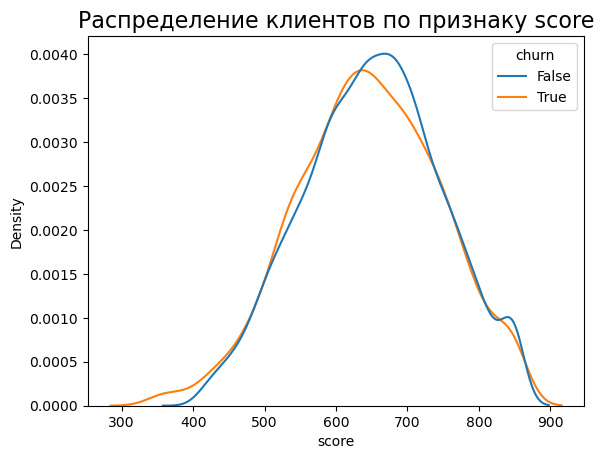

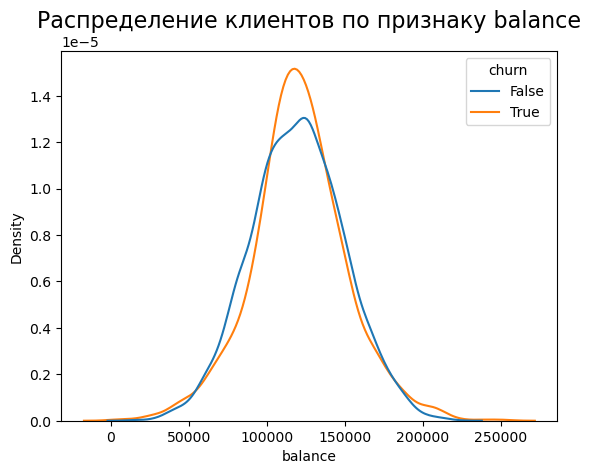

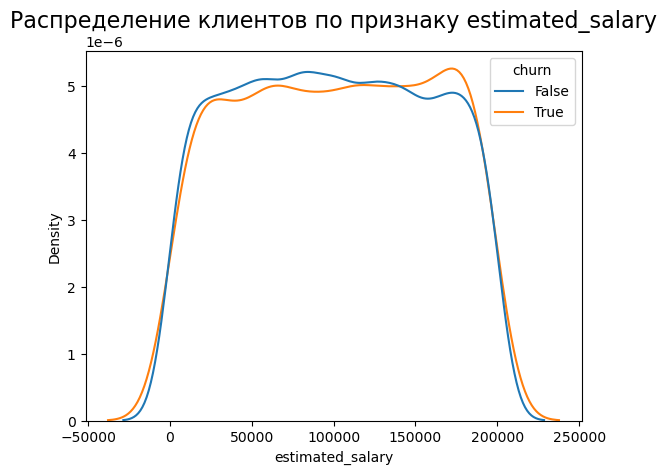

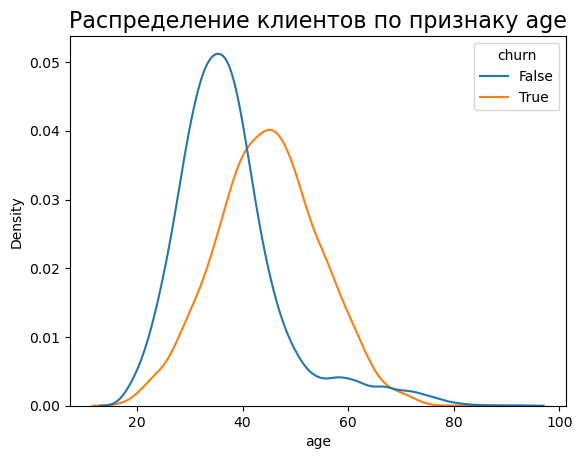

In [34]:
tables(bank, hue='churn') 

#### Вывод: 

Мы можем обратить внимание, что доля оттока составляет 20% от общего количества пользователей.

    Наименьшая доля оттока отображена в Ярославле, наибольшая в Ростове 50% от общего количества клиентов банка. Женщины более склонны к уходу и в абсолютном и относительном выражении. Пользователи кредитных карт уходят остаются почти в одинаковой пропорции, активные клиенты с большей долей скорей всего останутся с банком. 
    Клиенты, которые пользуются 2 продуктами - самая многочисленная группа по количеству преданных банку клиентов, а доля оттока у этой категории самая низкая. Тех, кто пользуется одним продуктом, доля оттока у них больше. 
    Клиенты с 3-4 продуктами банка за небольшим исключением полностью преданы банку.
    Больше всего клиентов - это люди, среднего возраста 30-40 лет, они составляют основную массу тех, кто остается с банком. К оттоку склонны клиенты в возрасте от 42-48 лет.
    Кредитный рейтинг, остаток на балансе и заработная плата клиента не оказывает влияние на принятие решения об уходе из банка.

#### Распределение признаков в разрезе с филалов 

Рассмотрю профили клиентов более подробно в разрезе филиалов, я заметил что доля в разных филиалах значительно отличается друг от друга.

In [35]:
city_group = bank.groupby('city')['city'].count().to_frame()
city_group.columns = ['city_cnt']
city_group

,city_cnt
city,
Ростов Великий,2509
Рыбинск,2477
Ярославль,5014


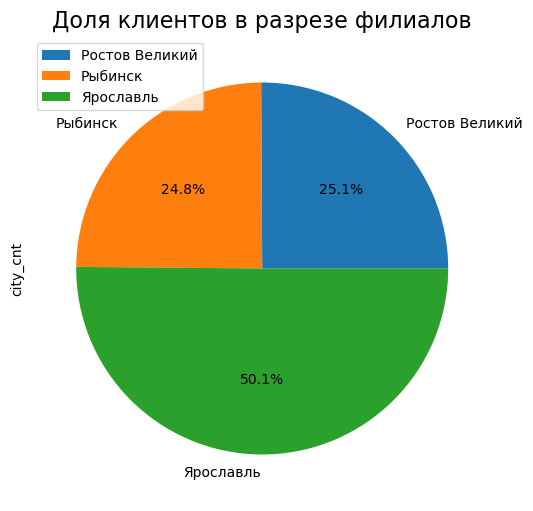

In [36]:
city_group.plot(kind = 'pie', y ='city_cnt', autopct='%1.1f%%', figsize= (6,8));
plt.title('Доля клиентов в разрезе филиалов', fontsize = 16)
plt.show()


Клиентов в Ярославле больше в 2 раза, чем в Ростове и Рыбинске.
Посмотрим на их средне и медианные данные.

In [37]:
bank.groupby(['city', 'churn'])['score', 'city', 'gender_М', 'age', 'objects', 'balance',
       'products', 'credit_card', 'loyalty', 'estimated_salary'].agg(
       ['mean', 'median', 'count']).T

city                    Ростов Великий               Рыбинск             \
churn                            False       True      False       True   
score            mean   653.26         647.69     652.10     647.48       
                 median 653.00         646.00     652.00     649.00       
                 count  1,695.00       814.00     2,064.00   413.00       
gender_М         mean   0.56           0.45       0.58       0.44         
                 median 1.00           0.00       1.00       0.00         
                 count  1,695.00       814.00     2,064.00   413.00       
age              mean   37.31          44.89      37.84      44.15        
                 median 36.00          45.00      36.00      44.00        
                 count  1,695.00       814.00     2,064.00   413.00       
objects          mean   5.01           5.01       5.11       4.66         
                 median 5.00           5.00       5.00       5.00         
                 count  1,695.00       814.00     2,064.00   413.00       
balance          mean   119,427.11     120,361.08 119,820.56 119,792.06   
                 median 120,252.02     118,951.22 120,047.26 118,540.13   
                 count  1,695.00       814.00     1,028.00   250.00       
products         mean   1.55           1.45       1.54       1.51         
                 median 2.00           1.00       2.00       1.00         
                 count  1,695.00       814.00     2,064.00   413.00       
credit_card      mean   0.72           0.71       0.70       0.67         
                 median 1.00           1.00       1.00       1.00         
                 count  1,695.00       814.00     2,064.00   413.00       
loyalty          mean   0.56           0.36       0.57       0.34         
                 median 1.00           0.00       1.00       0.00         
                 count  1,695.00       814.00     2,064.00   413.00       
estimated_salary mean   102,414.66     98,403.89  98,602.37  103,629.55   
                 median 103,557.85     96,498.14  98,768.45  108,732.96   
                 count  1,695.00       814.00     2,064.00   413.00       

city                     Ярославль             
churn                        False       True  
score            mean   651.16     641.91      
                 median 655.00     643.50      
                 count  4,204.00   810.00      
gender_М         mean   0.57       0.43        
                 median 1.00       0.00        
                 count  4,204.00   810.00      
age              mean   37.24      45.13       
                 median 36.00      45.00       
                 count  4,204.00   810.00      
objects          mean   5.01       5.00        
                 median 5.00       5.00        
                 count  4,204.00   810.00      
balance          mean   119,484.84 121,915.78  
                 median 119,380.37 123,497.58  
                 count  2,123.00   473.00      
products         mean   1.54       1.48        
                 median 2.00       1.00        
                 count  4,204.00   810.00      
credit_card      mean   0.71       0.70        
                 median 1.00       1.00        
                 count  4,204.00   810.00      
loyalty          mean   0.55       0.37        
                 median 1.00       0.00        
                 count  4,204.00   810.00      
estimated_salary mean   99,217.10  103,439.28  
                 median 98,045.04  103,739.24  
                 count  4,204.00   810.00

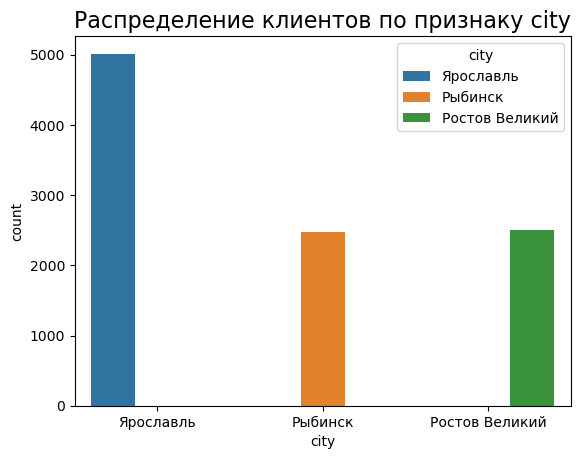

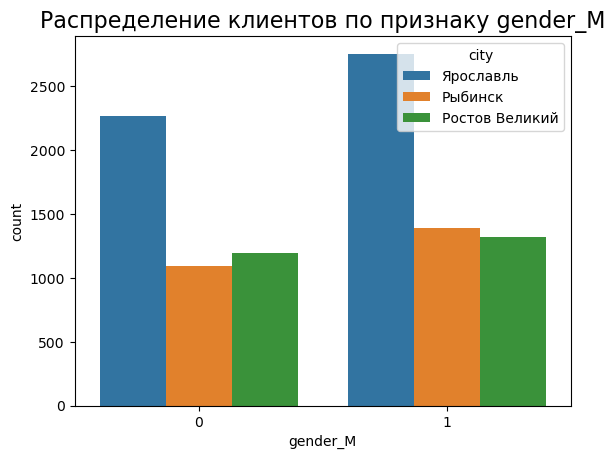

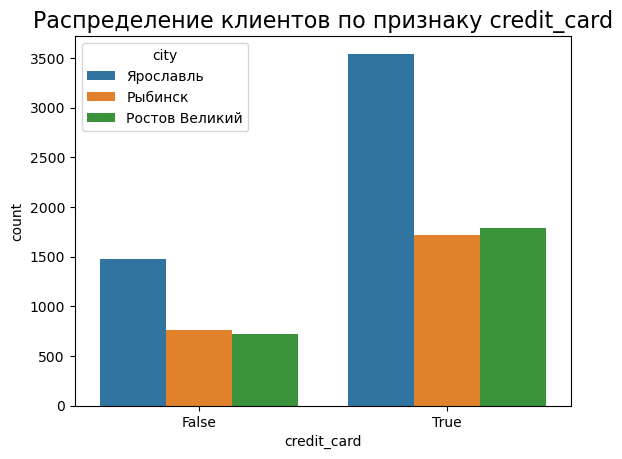

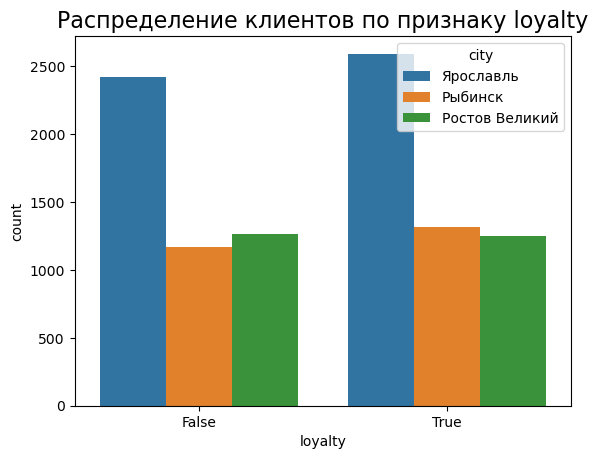

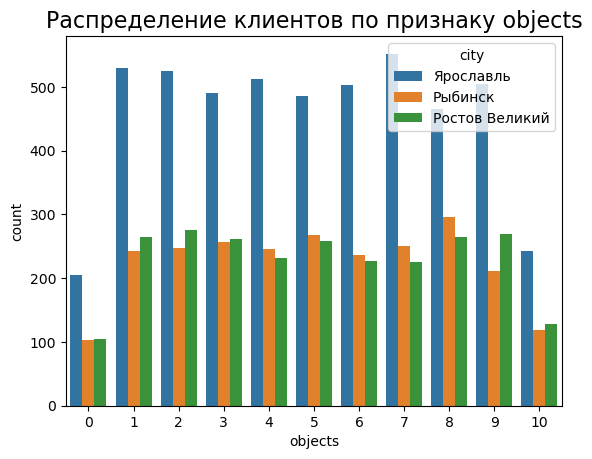

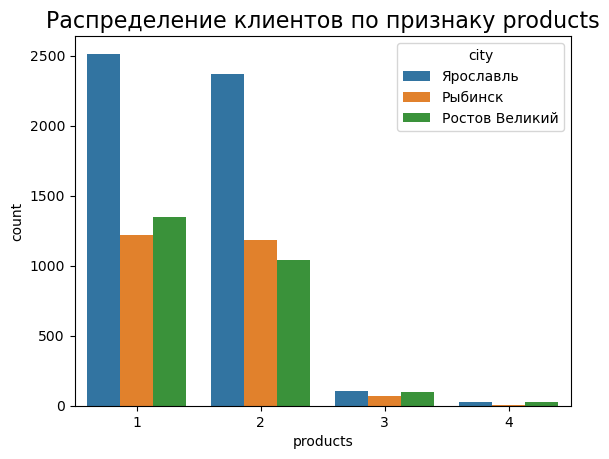

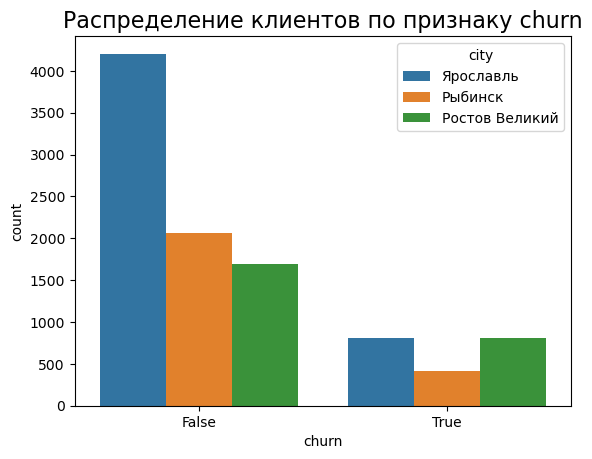

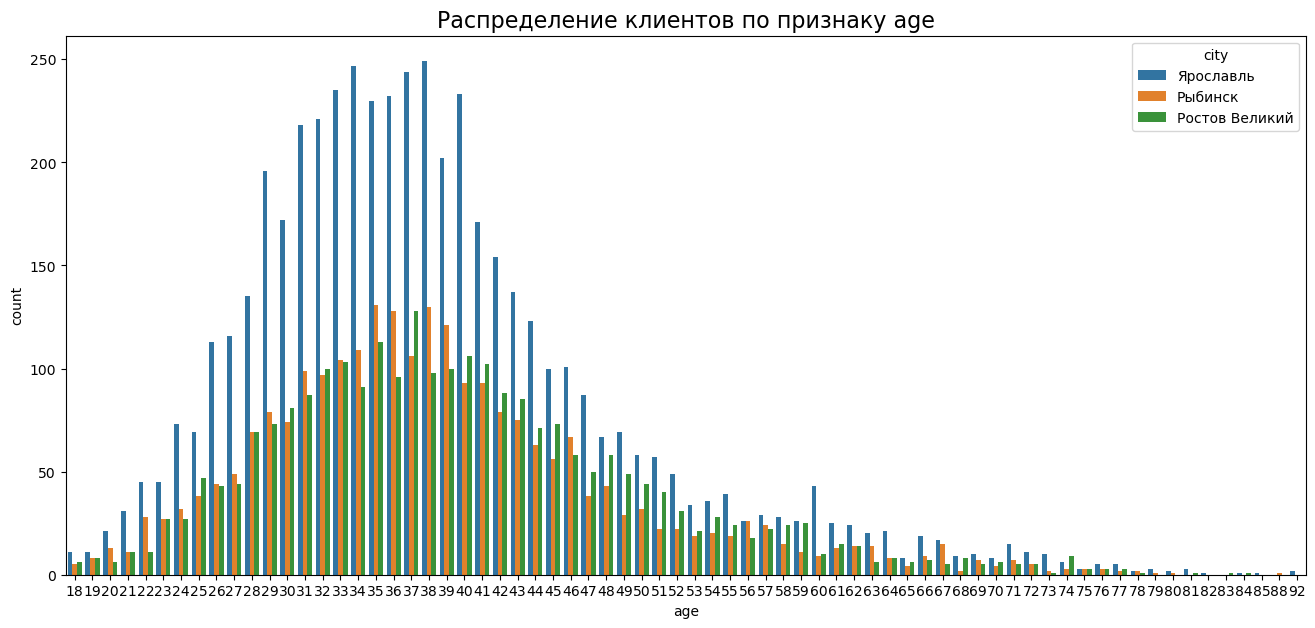

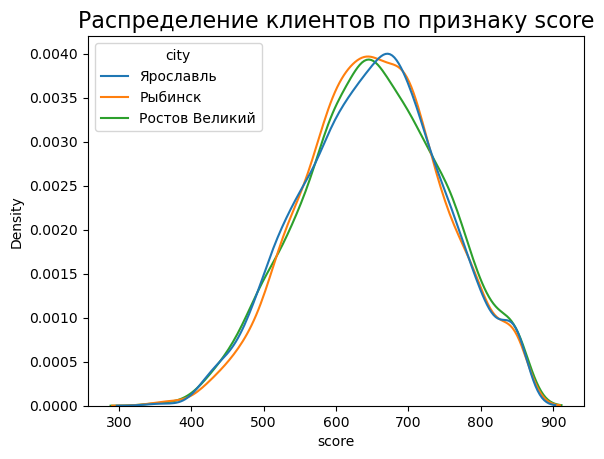

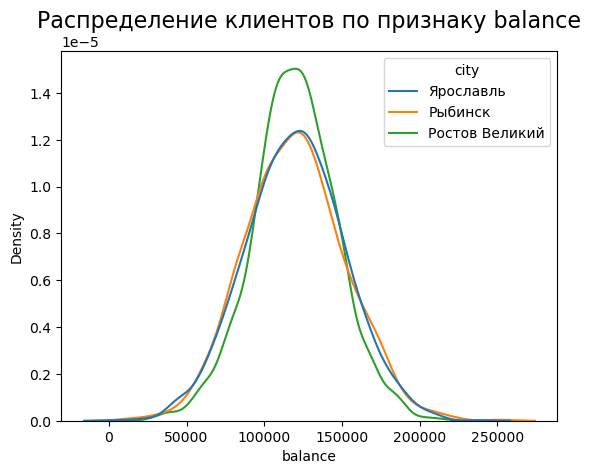

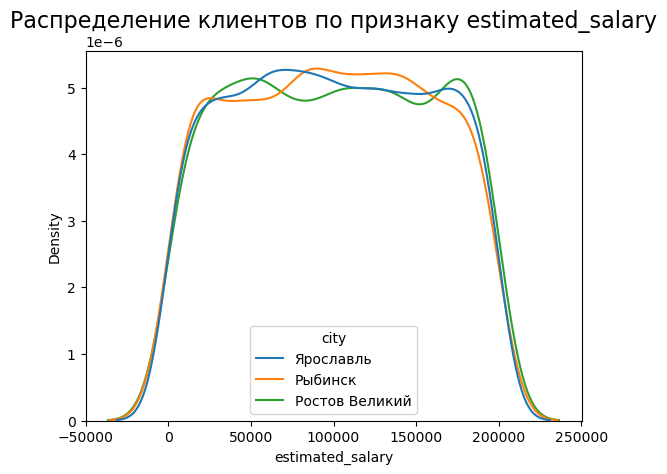

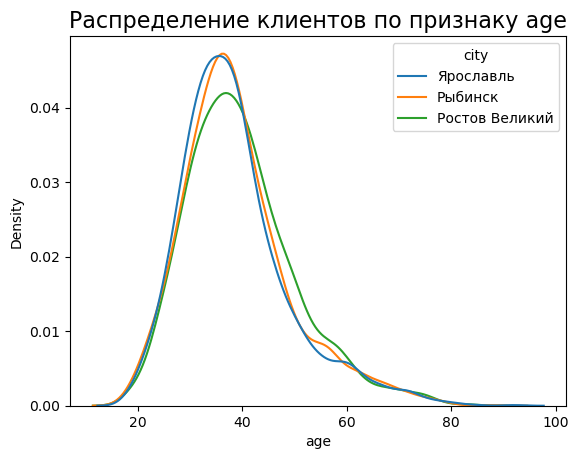

In [38]:
tables(bank, hue='city')

Мы можем заметить, что в Ростове остатки на счетах выше, чем в Ярославле и Рыбинске: в 1,5-2 раза. Отток в Ростове находится на уровне Ярославля, который крупнее его в два раза. И сообственно, на этом различия заканчиваются: в остальном на каждый из филиалов распространяются следующие закономерности:
Женщины уходят чаще, чем мужчины, возраст в группе оттока выше возраста тех, кто остается в банке, чаще уходят клиенты с одним продуктом, а остаются - клиенты с двумя.

#### Заивисимость признаков клиента от города обслуживания:

Посмотрим есть ли зависимость между какими-либо категориями признаков и городом обслуживания:

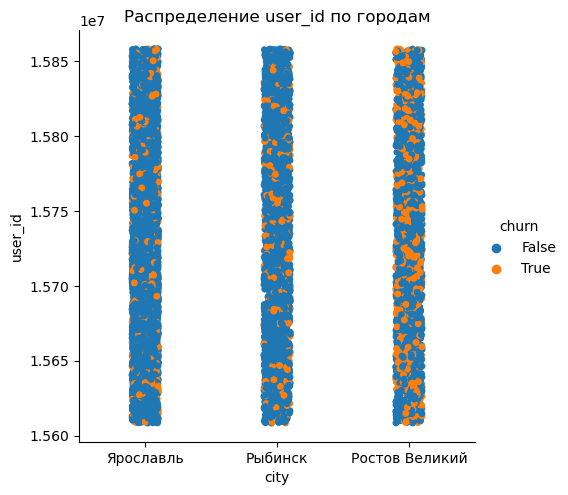

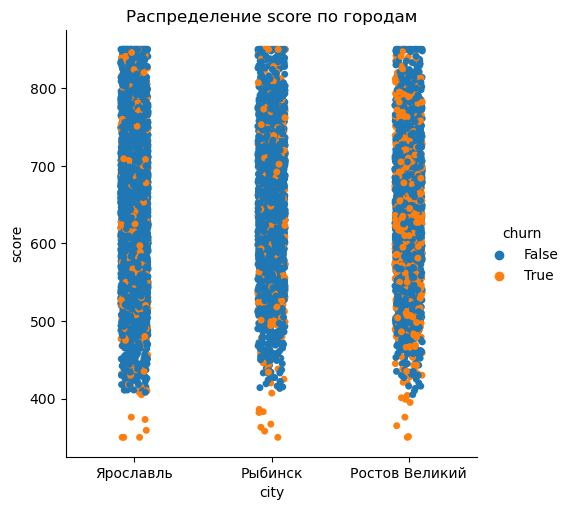

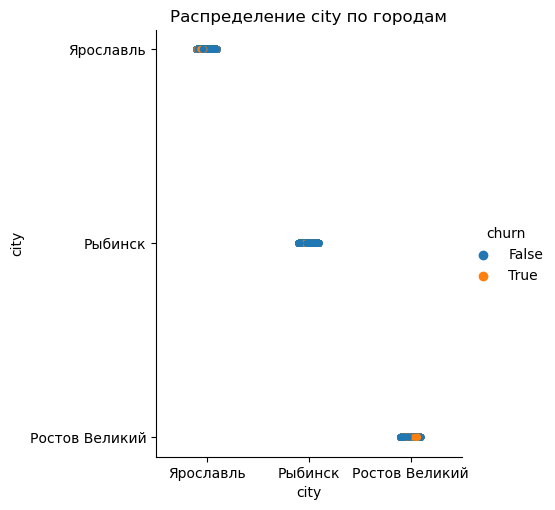

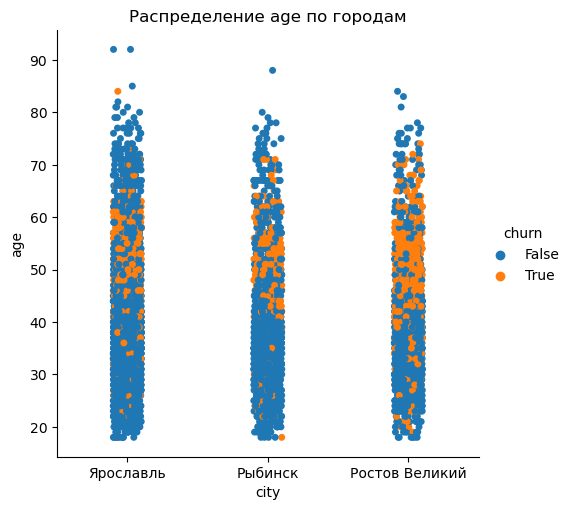

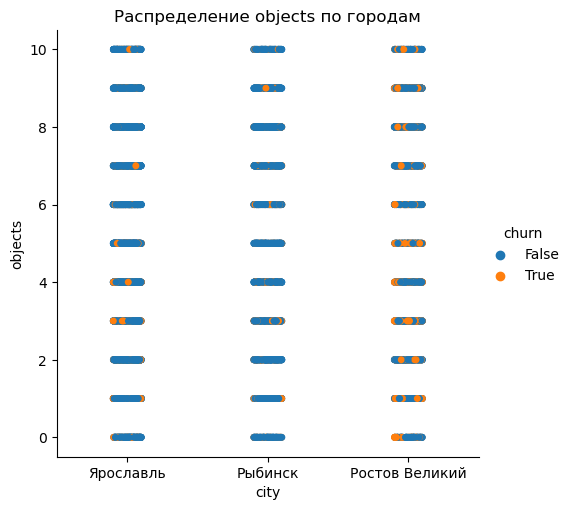

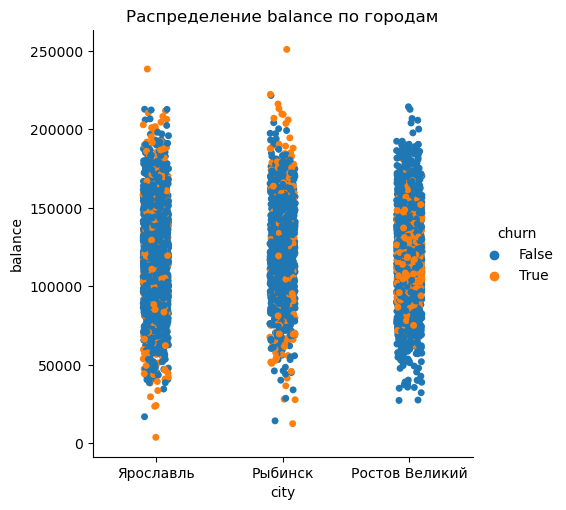

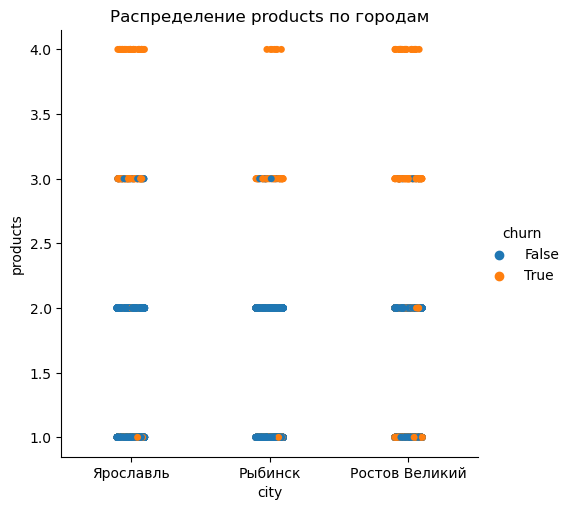

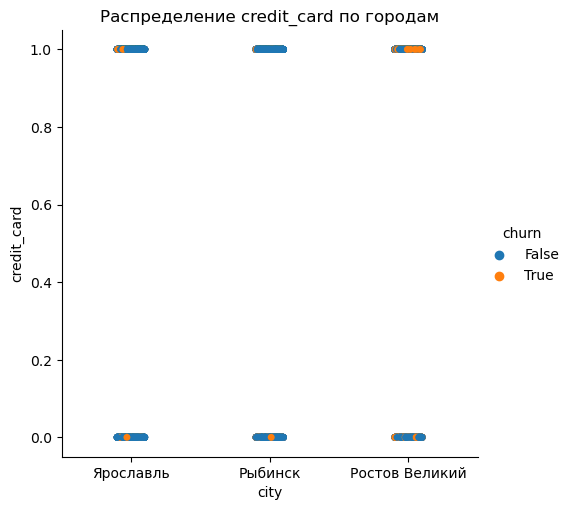

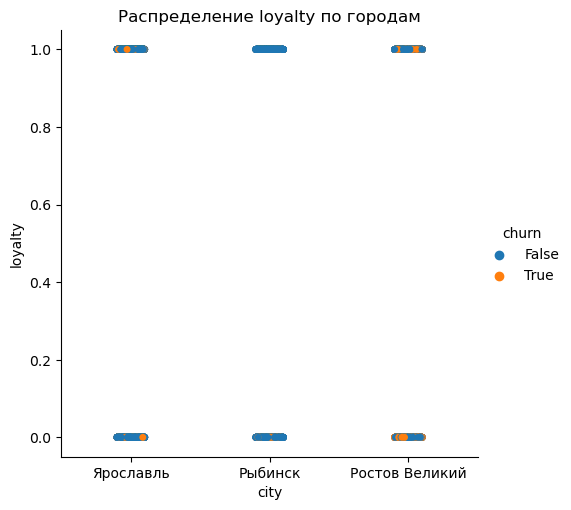

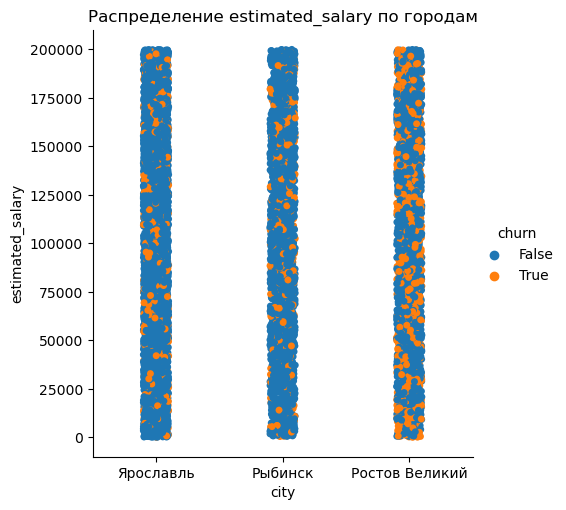

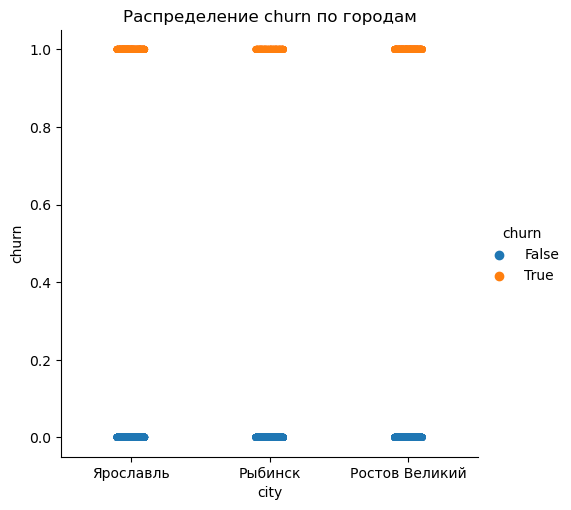

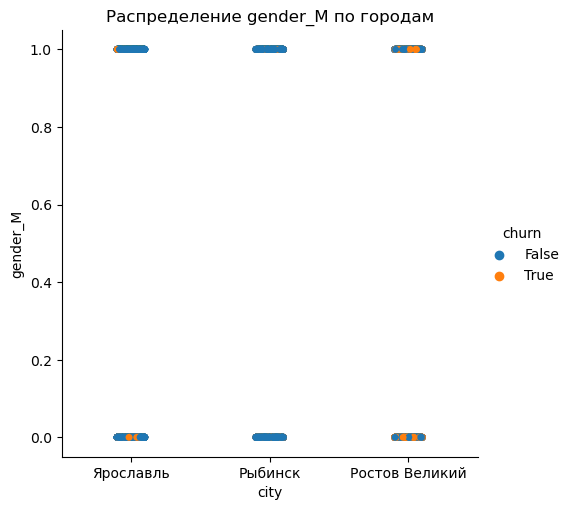

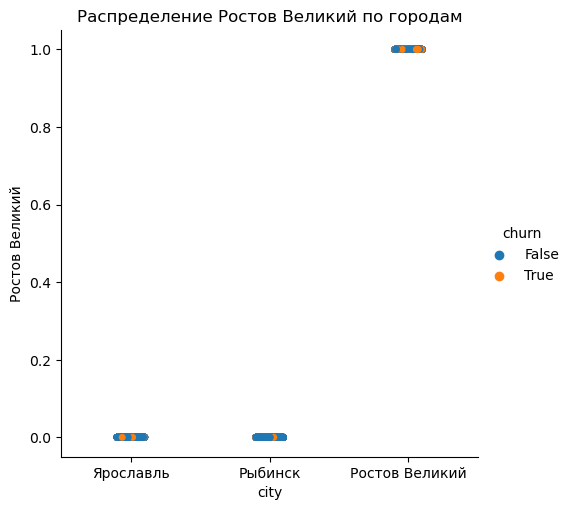

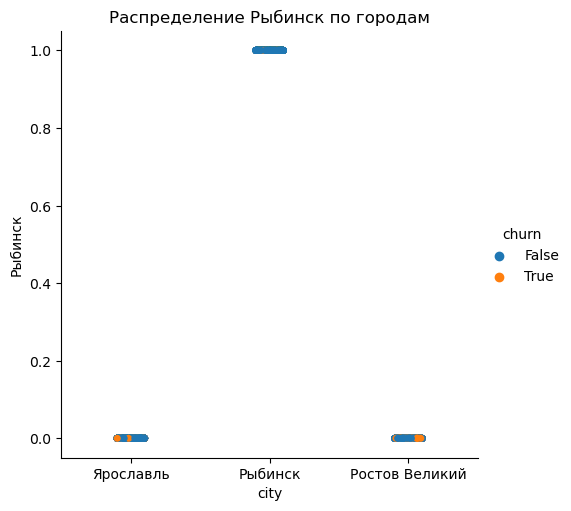

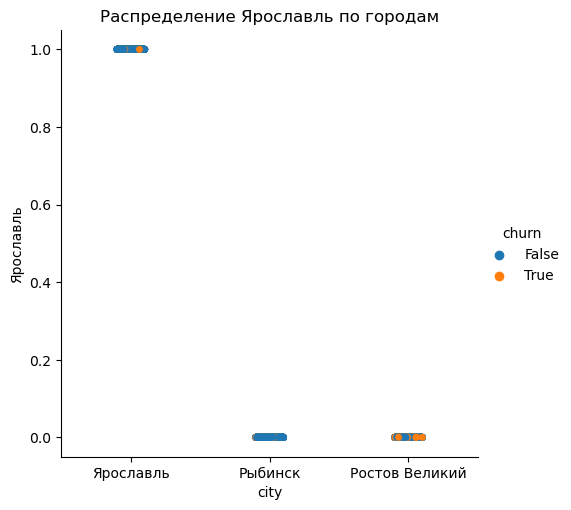

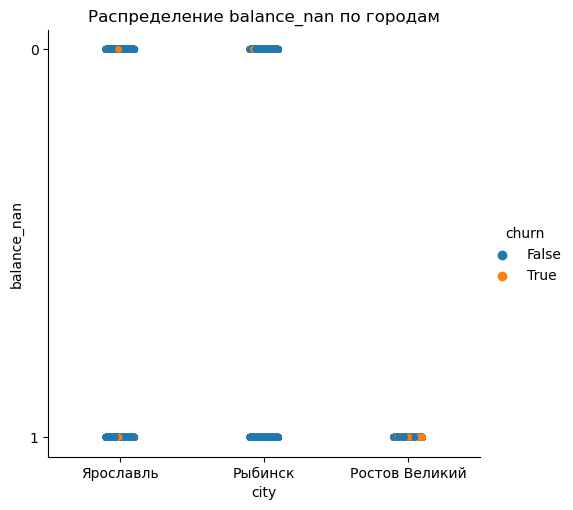

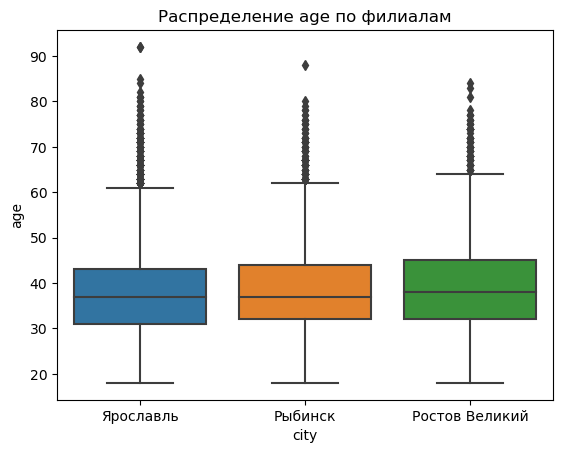

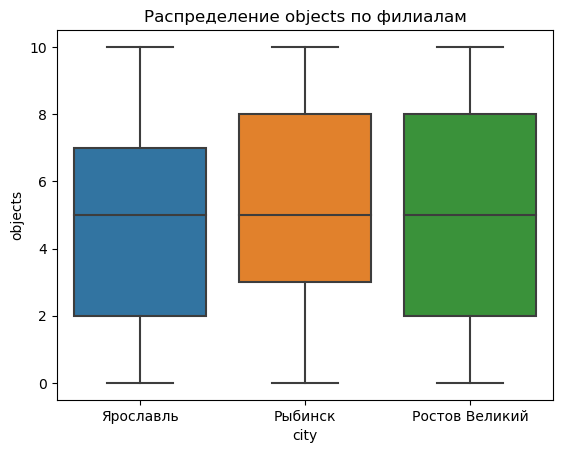

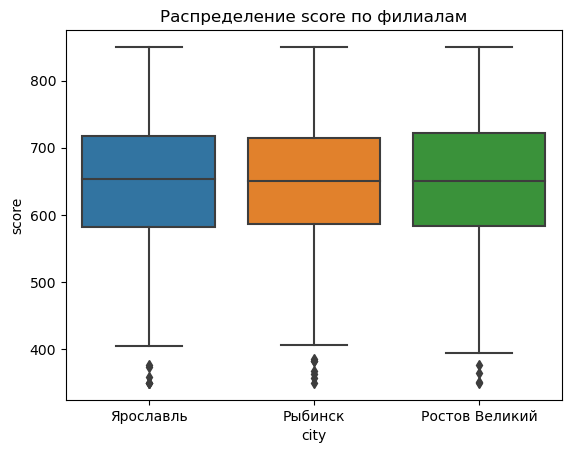

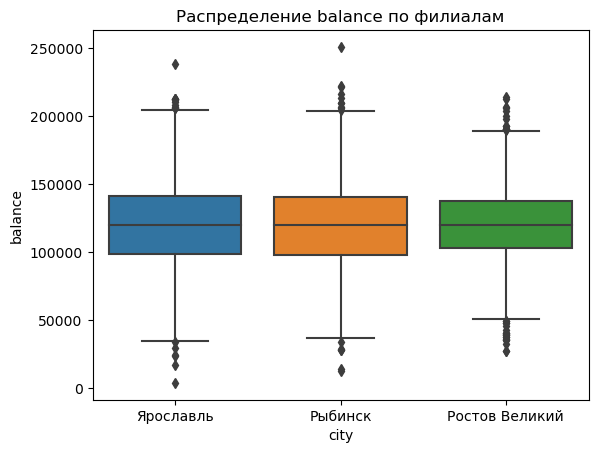

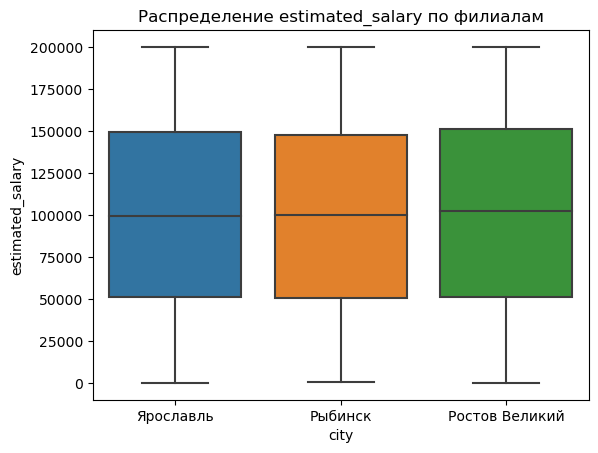

In [39]:
for column in bank.columns.values:
    sns.catplot(y=column, x='city', hue='churn', data=bank).set(
                                     title=f'Распределение {column} по городам');
    plt.show()
    
for column in ['age', 'objects', 'score',  'balance', 'estimated_salary']:
    sns.boxplot(
        x = 'city', y = bank[column], data = bank).set(
         title=(f'Распределение {column} по филиалам'))
    plt.show()

#### Вывод:

На основе полученных графиков мы можем сделать следующие выводы:
   1. В ростове клиентский отток больше.
   2. Во всех филиалах клиенты с баллами скоринга менее 400 - потенциальный отток.
   3. В Ярославле и Рыбинске, чаще всего уходят клиенты в возрасте 46-60 лет, а в Ростове 40-70 лет.
   4. Остатки на балансе во всех филиалах примерно одинаковые, разброс составляет от 0-230 тысяч, но мы видим, что в Ростове отточные клиенты - с остатками на счетах от 100-150тысяч, а в Рыбинске, который по рахмеру филиала идентитечен Ростову - т.е кто держит до 60 тысяч, либо от 200тысяч, и выше, а в Ярославле нет четкой тенденции. 
   
   Если говорить о количестве используемых продуктов, то здесь просматривается общая тенденция: отток составляют в основном клиенты с 3-4 продуктами, но в Ростове оттоку подвержена и значительная часть клиентов 1 и 2 групп (с 1 и 2 продуктами в использовании).

#### Расрпеделние признаков в разрезе количества используемых продуктов

Посмотрим, чем отличаются пользователи, пользующиеся разным количеством продуктов

In [40]:
#количество пользователей по продуктам
products_group = bank.groupby('products')['products'].count().to_frame()
products_group.columns = ['products_cnt']
products_group

,products_cnt
products,
1,5084
2,4590
3,266
4,60


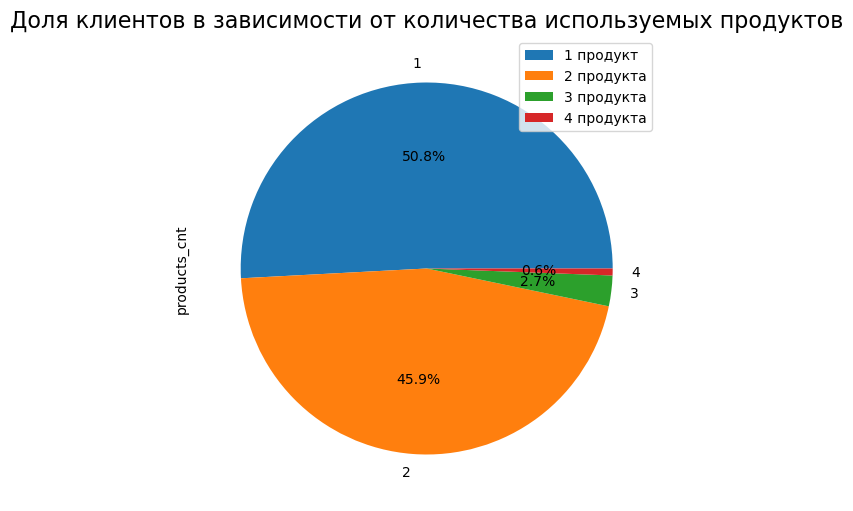

In [41]:
products_group.plot(kind = 'pie', y ='products_cnt', autopct='%1.1f%%', figsize= (6,8))
plt.title('Доля клиентов в зависимости от количества используемых продуктов', fontsize = 16)
plt.legend(['1 продукт','2 продукта','3 продукта','4 продукта'])
plt.show()

In [42]:
#группировка признаков по количеству продуктов
bank.groupby(['products', 'churn'])['score', 'city', 'gender_М', 'age', 'objects', 'balance',
       'products', 'credit_card', 'loyalty', 'estimated_salary'].agg(
       ['mean', 'median', 'count']).T

products                         1                     2             \
churn                        False       True      False       True   
score            mean   650.43     645.72     652.89     643.61       
                 median 653.00     647.00     653.00     645.00       
                 count  3,675.00   1,409.00   4,242.00   348.00       
gender_М         mean   0.58       0.46       0.56       0.40         
                 median 1.00       0.00       1.00       0.00         
                 count  3,675.00   1,409.00   4,242.00   348.00       
age              mean   37.67      44.91      37.19      44.66        
                 median 36.00      45.00      36.00      44.00        
                 count  3,675.00   1,409.00   4,242.00   348.00       
objects          mean   5.00       4.91       5.06       4.91         
                 median 5.00       5.00       5.00       5.00         
                 count  3,675.00   1,409.00   4,242.00   348.00       
balance          mean   119,488.13 121,072.46 119,628.16 119,877.18   
                 median 119,679.49 120,392.99 120,022.92 118,283.65   
                 count  3,108.00   1,071.00   1,728.00   262.00       
products         mean   1.00       1.00       2.00       2.00         
                 median 1.00       1.00       2.00       2.00         
                 count  3,675.00   1,409.00   4,242.00   348.00       
credit_card      mean   0.70       0.70       0.71       0.68         
                 median 1.00       1.00       1.00       1.00         
                 count  3,675.00   1,409.00   4,242.00   348.00       
loyalty          mean   0.57       0.34       0.54       0.39         
                 median 1.00       0.00       1.00       0.00         
                 count  3,675.00   1,409.00   4,242.00   348.00       
estimated_salary mean   99,045.36  100,639.83 100,416.63 100,883.31   
                 median 98,646.22  101,108.85 100,609.95 101,341.90   
                 count  3,675.00   1,409.00   4,242.00   348.00       

products                         3                     4  
churn                        False       True       True  
score            mean   670.04     643.52     653.58      
                 median 671.50     647.50     643.00      
                 count  46.00      220.00     60.00       
gender_М         mean   0.57       0.41       0.37        
                 median 1.00       0.00       0.00        
                 count  46.00      220.00     60.00       
age              mean   37.30      44.43      45.68       
                 median 35.00      44.00      45.00       
                 count  46.00      220.00     60.00       
objects          mean   4.85       5.04       5.30        
                 median 4.00       5.00       5.00        
                 count  46.00      220.00     60.00       
balance          mean   118,423.61 119,542.27 122,260.61  
                 median 127,221.57 117,927.68 120,968.27  
                 count  10.00      158.00     46.00       
products         mean   3.00       3.00       4.00        
                 median 3.00       3.00       4.00        
                 count  46.00      220.00     60.00       
credit_card      mean   0.74       0.71       0.68        
                 median 1.00       1.00       1.00        
                 count  46.00      220.00     60.00       
loyalty          mean   0.61       0.39       0.48        
                 median 1.00       0.00       0.00        
                 count  46.00      220.00     60.00       
estimated_salary mean   92,560.21  106,776.61 104,763.72  
                 median 84,906.67  104,612.24 112,163.11  
                 count  46.00      220.00     60.00

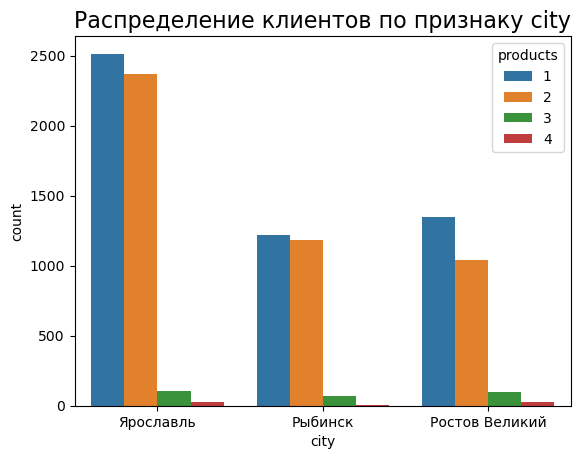

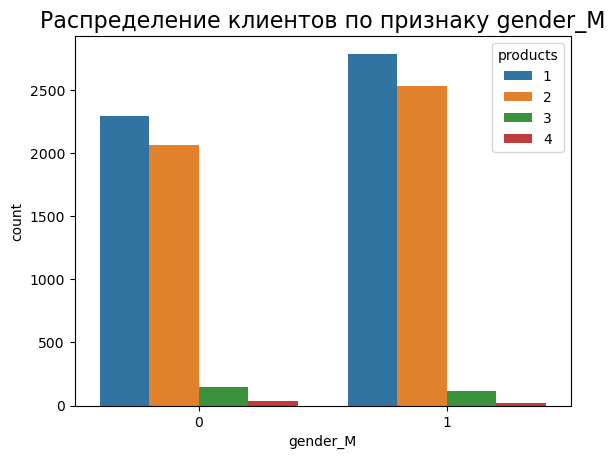

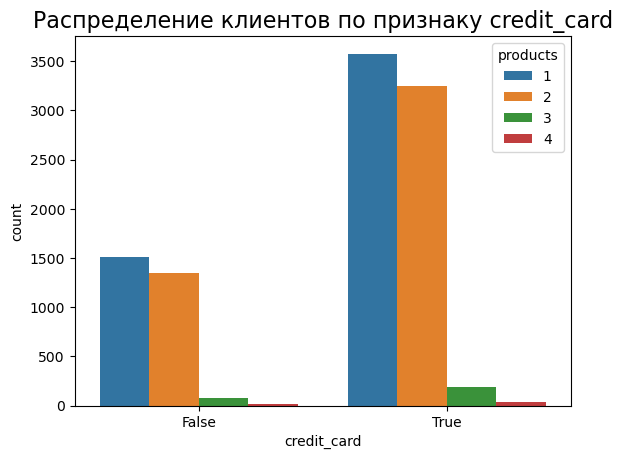

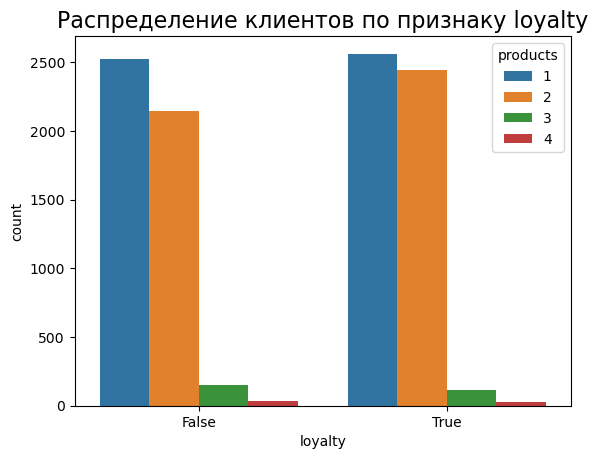

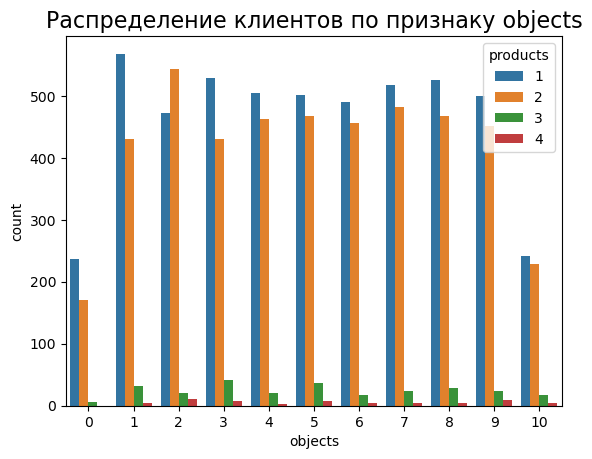

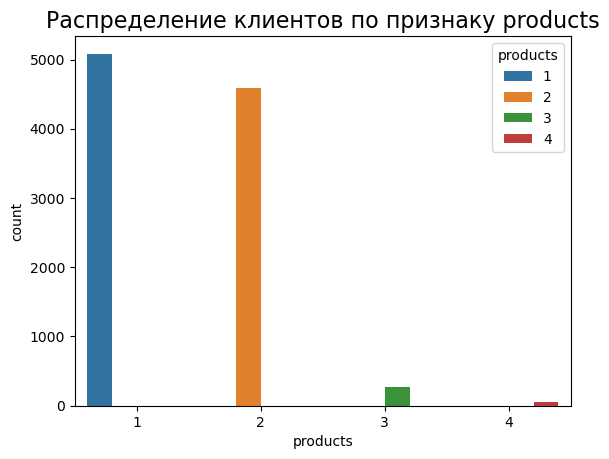

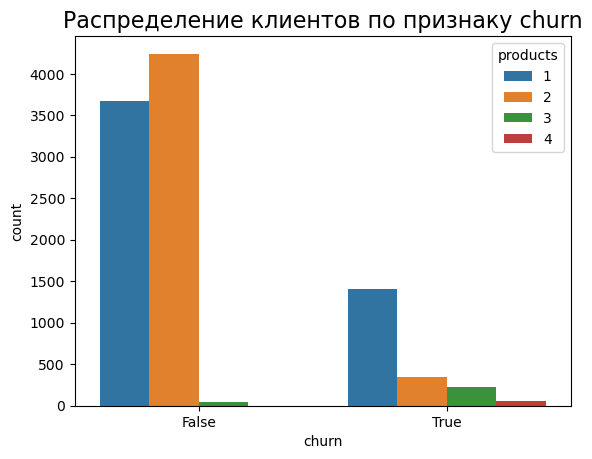

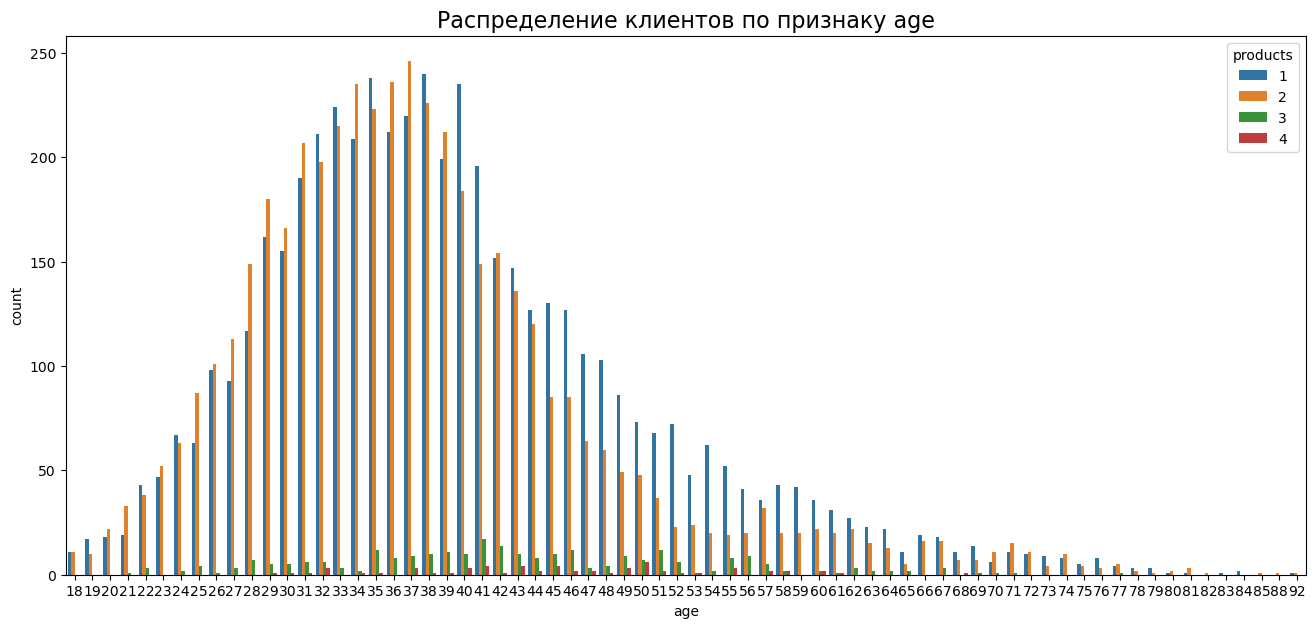

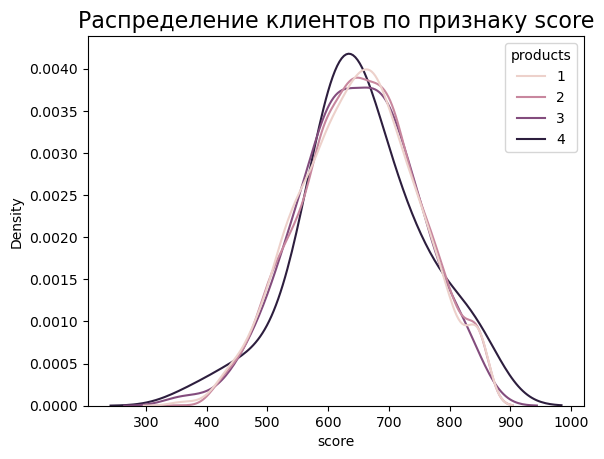

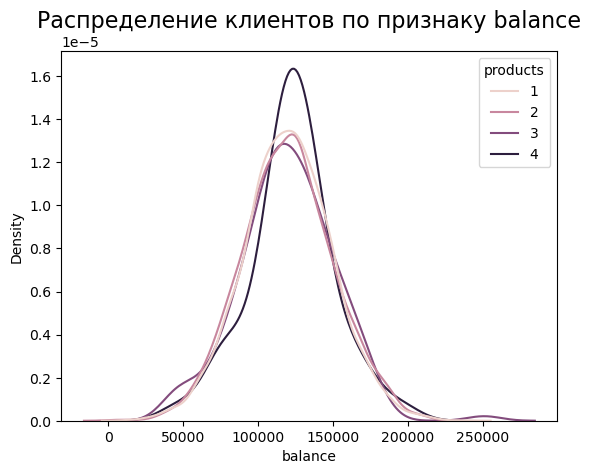

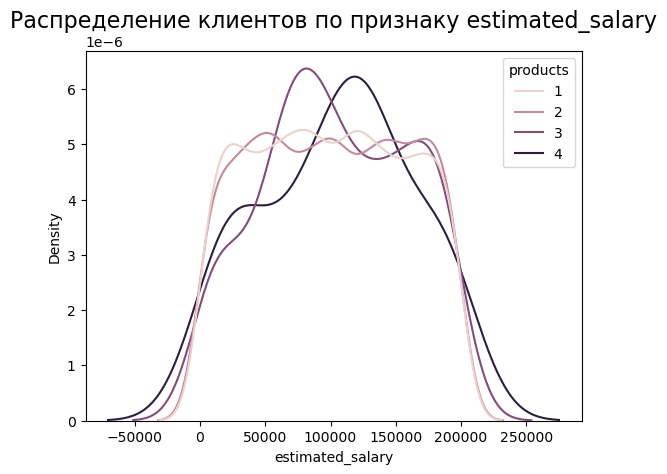

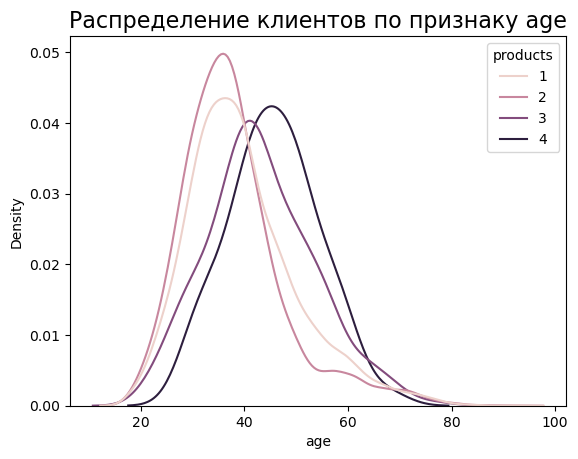

In [43]:
tables(bank, hue='products')   

#### Вывод:

    1. Клиенты которые пользуются 4 продуктами, полностью уходят в отток. Это самая маленькая группа клиентов, из Ярославля и Ростова.
    
    Клиентский портет 4 группы:
    Женщина
    Возраст 45 лет
    Баланс 120 тысяч
    Доход 104-112 тысяч.
    Неактивный пользователь.
    
    2. Клиенты, у которых в использовании 3 продукта, составляют менее 3% от общего количества и так же характеризуются высоким коэффециентом оттока, но более равномерно распределены по филиалам. Усредненнный портрет отточного клиента:
    Женщина 
    Возраст 44 лет
    Баланс 118-119 тысяч
    Доход 107-108 тысяч
    Неактивный пользователь.
    
    Портрет постоянного клиента:
    Мужчина
    Возраст 35-37 лет
    Баланс 118-127 
    Доход 85-92 
    Активный пользователь.
    
    3. Клиенты, которые пользуются 1/2 продуктами. Распределены по городам пропорционально.
    Портрет отточного клиента:
    Женщина
    Возраст 45 лет
    Баланс 118-122
    Зарплата 101 тысяч
    Неактивный пользователь.
    
    Портрет постоянного клиента:
    Мужчина
    Возраст 36-37 лет
    Баланс 119-120
    Доход 99-100
    Активный пользователь.
    
    Мы можем сделать вывод, что ощутимой разницы между клиентами и их постояннством в группах нет.
    Есть некая тенденция к уходу у женщин 45 лет и тенденция к постоянству у мужчин 35-37 лет, которая не является абсолютной. 
    Но факт количества используемых продуктов является характеристикой, позволяющей судить о том, с какой вероятностью он останется в банке или уйдет. 
    Можно сказать, что самая лояльная группа это клиенты с двумя продуктами, а взоне риска находятся клиенты 4 и 3 группы. При этом наличие 4 продуктов у клиента озночает 100% отток.

### Зависимость признаков клиента и количества продуктов в использовании

Построю диаграммы разброса и боксплоты:

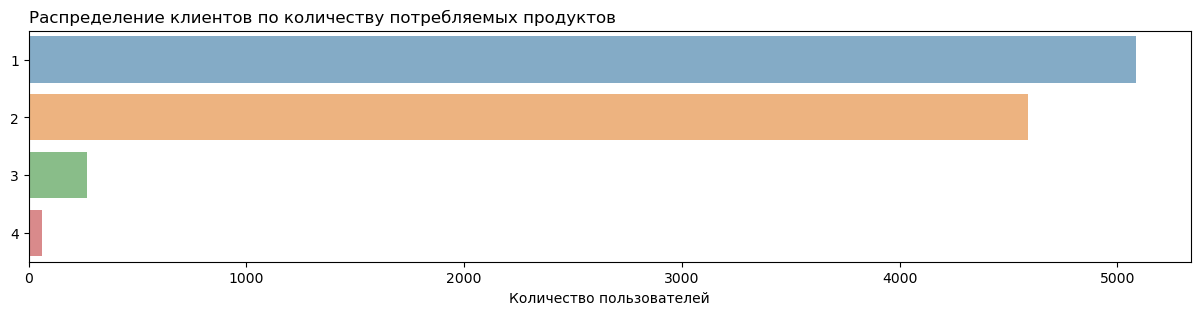

In [44]:
plt.figure(figsize = (15,3))
ax = sns.barplot(x='count',
                y='products',
                data = bank.groupby('products').agg(count=('user_id','count')).reset_index(),
                orient = 'h', alpha = 0.6)
ax.set_title('Распределение клиентов по количеству потребляемых продуктов', loc='left')
ax.set_xlabel('Количество пользователей')
ax.set_ylabel('')
plt.show()

Пользователи с 3/4 продуктами, практически полностью отточны, вне зависимости от возраста, а наименьший отток в группе с 2 продуктами.
При этом можно заметить, что в Ростове единичный отток есть даже во 2 группе. Возможно клиент, кторого что-то не устраивает, начинает смотреть другие продукты, вероятней всего его не устраивают условия этих продуктов, он делает выбор уйти. 

Кроме того абсолютная зона риска - клиенты с кредитным рейтенгом 400, независимо от количества продуктов.


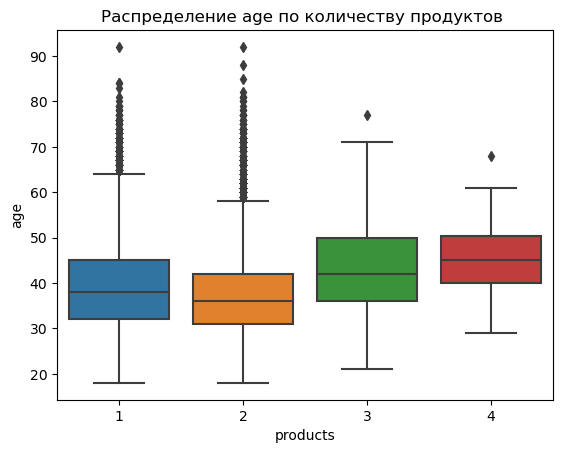

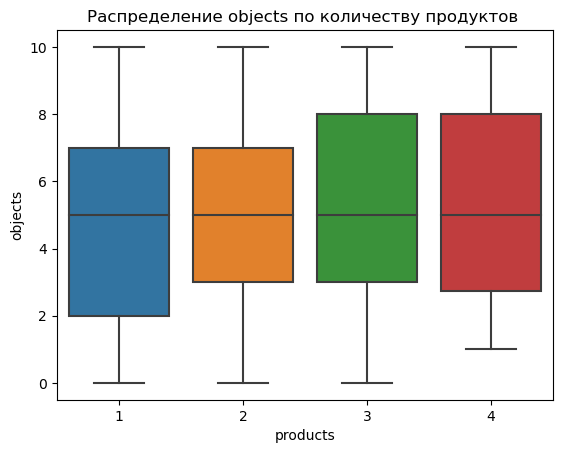

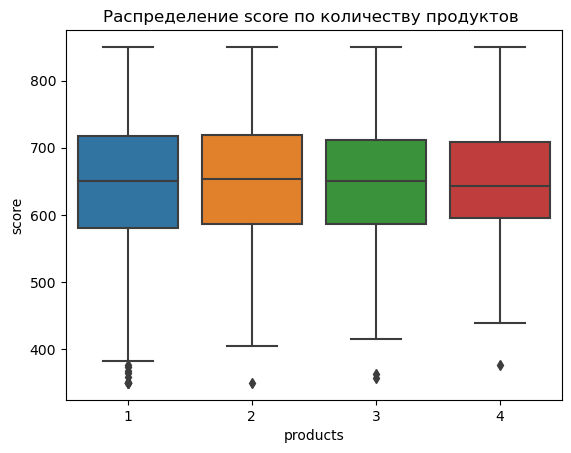

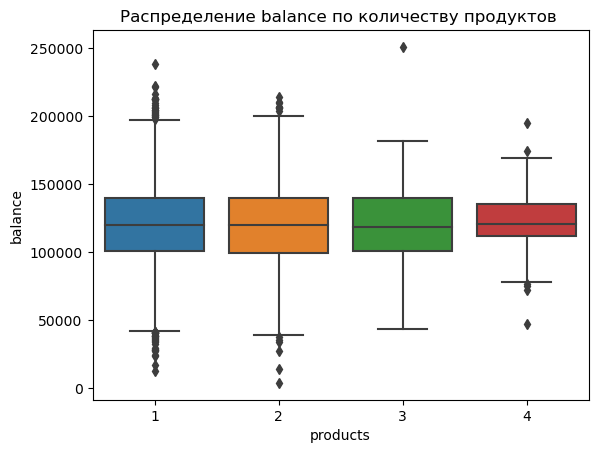

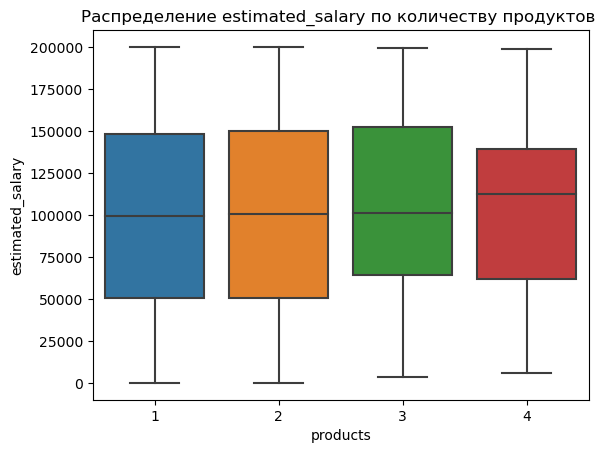

In [45]:
for column in ['age', 'objects', 'score',  'balance', 'estimated_salary']:
    sns.boxplot(
        x = 'products', y = bank[column], data = bank).set(
        title=(f'Распределение {column} по количеству продуктов '))
    plt.show()
    

3/4 продукта берут клиенты, их медианный возраст составляет 42-45, выше чем, у потребителей одного и двух продуктов 35-39 лет.
Так же можно ометить, достаточно большие относительно других балансовые остатки у клиентов потребляющих 4 продукта, а их заработок выше.

#### Вывод по разделу:
    Самый большой филиал находится в ярославле, в Рыбинске и в ростое клиентов в 2 раза меньше.
    
    Портрет клиента банка, в основном это мужчины перевес (5%), в возрасте 37-38 лет, с 5 объектами недвижимости, средним остатком на счете 120 тыс.рублей, и средним доходом 100 тысяч рублей, пользуются 1-2 продуктами один из которых это кредитная карта. Клиент скорей активный чем нет, но по сравнению с неактивными находятся на одном уровне.
    Отток в виде 20% очень большой процент для оттока. Мы не можем спрогнозировать скорость оттока по времени, так как неизвестен период, за который накоплены анализируемые данные, но если его не восполнять либо не удерживать новыми клиентами банк может утратить себя.
    Корреляции между признаками нет.
#### Распределение признаков относительного оттока:
    Наименьшая доля отттока в Ярославле, наибольший в Ростове 50% от количества постоянных клиентов. Женщины наиболее склонны к уходу в абсолютном и относительном выражение. Пользователи кредитных кард уходят/остаются почти в одинаковой пропорции, активные клиенты с большей доей вероятности останутся с банком.
    Клиенты, которые пользуются двумя продуктами самая-многочисленная група по количеству преданных банку клиентов, а доля оттока у этой категории самая низкая. Тех, кто пользуется одним продуктом, немногим меньше, но доля оттока у них больше. Пользователи с 3/4 продуктами за небольшим исключением полностью отточны.
    Больше всего клиентов - это люди среднего возраста, 30-40 лет, они составляют основную массу тех, кто остается с банком. Наиболее склонны оттоку клиенты в возрасте 42-48 лет.
    Кредитный рейтинг, остаток на балансе и заработная плата клиента не оказывает влияние на принятие решение об уходе из банка.
#### Особенности, выявленные у клиентов филиалов разных городов:
    
    В ростове клиентский отток больше.
    
    Во всех филиалах клиенты с баллами скоринга менее 400 - потенциальный отток.
    
    Возрастной состав по филиалам примерно одинаков. В Ярославле и Рыбинске чаще всего в отток уходят клиенты в 46-60 лет, в Ростове 40-70 лет. 
    
    Остатки на балансе во всех филиалах также примерно одинаковы, но мы видим, что в Ростове отточные клиенты с остатками на счетах 100-150 тысяч, а в Рыбинске, который. по размеру филиала идентичен Ростову, - те, кто держит на счете оибо до 60, от 200тысяч. 
    Отток составляют в основном клиенты с 3-4 продуктами, но в ростове оттоку подвержена и значительная часть клиенты с 1/2 продуктами.
#### Распределение по количеству потребляемых продуктов. 
    Клиенты, которые пользуются 4 продуктами полностью уходят в отток.  
    Клиенты у которых три продукта, имеют свойство оттока достаточно высокое как и у клиентов с 4 продуктами.
    Клиенты у которых 1/2 продукта наиболее меньший процент оттока
    
    

## Проверка гипотез

### Проверка гипотезы о различии дохода между клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним продуктом

Сформулируем гипотезы:

Н0 :статистически значимых различий в доходе клиентов, которые пользуются одним продуктом и теми, кто пользуется двумя продуктами, нет

Н1 : статистически значимые различия в доходе клиентов, которые пользуются одним продуктом и теми, кто пользуется двумя продуктам, есть

Подготовим и проанализируем данные:

### Проверка гипотезы, с помощью t-test Стьюдента, так как он хорошо работает для выборки любого размера и нашей выборки подойдет идеально

In [46]:
#формируем выборки дохода клиентов, пользующихся 1 и 2 продуктами
salary_1 = bank.query('products == 1')['age']
salary_2 = bank.query('products == 2')['age']

In [47]:
#Проверка гипотезы с помощью t-теста
results = st.ttest_ind(salary_1, salary_2, equal_var = False)
#Критический уровень статистической значимости
alpha = 0.05
print('p-значение: ',results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  1.4069637543991388e-19
Отвергаем нулевую гипотезу


In [48]:
salary_1.mean()

39.67309205350118

In [49]:
salary_2.mean()

37.75359477124183

На основе полученных данных мы отвергаем нулевую гипотезу и можем обратить внимание, что в серднем возрасте клиентов, использующих одним или два продукта банка, есть различие а именно: 
    
    39 лет - средний возраст, клиента который, пользуется 1 продуктом.
    37 лет - средний возраст, клиента который, пользуется 2 продуктами.

### U-Test

In [50]:
salary_1 = bank.query('products == 1')['age']
salary_2 = bank.query('products == 2')['age']

In [51]:
results = st.mannwhitneyu(salary_1, salary_2)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 

p-значение:  1.248185983698308e-22
Отвергаем нулевую гипотезу: разница статистически значима


U-критерий более точный и сравнивает  медианы, а не средние.

### Сформулируем гипотезы:

Н0 : Средние доходы клиентов с одним продуктом и клиентов с двумя продуктами равны

Н1 : Средние доходы клиентов с одним продуктом и клиентов с двуия продуктами не равны

Проверю гипотезы, с помощью t-test Стьюдента, так как он хорошо работает для выборки любого размера и нашей выборки подойдет идеально.

In [52]:
product_1 = bank[(bank['products']==1)]['estimated_salary']
product_2 = bank[(bank['products']==2)]['estimated_salary']
print('Количество клиентов с 1 продуктом',len(product_1))
print('Количество клиентов с 2 продуктом',len(product_2))

Количество клиентов с 1 продуктом 5084
Количество клиентов с 2 продуктом 4590


In [53]:
results = st.ttest_ind(product_1, product_2, equal_var = False)
#Критический уровень статистической значимости
alpha = 0.05
print('p-значение: ',results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.4106493940071987
Не получилось отвергнуть нулевую гипотезу


In [54]:
product_1.mean()

99487.25685090481

In [55]:
product_2.mean()

100452.01282135077

Нулевую гипотезу отвергнуть не удалось: Разницы в доходах у клиентов с одним и двумя продуктами не наблюдается с большой долей вероятности:

    Средние доходы сильно не отличаются: 99487/100452

## Вывод

Гипотеза о равенстве дохода клиентов банка в Рыбинске и Ростове не опровергнута. С большой степенью вероятности доходы клиентов Рыбинска и Ростова не отличаются.


### Вывод по разделу 4:

Гипотезы о равенстве дохода у клиентов, пользующихся одним и двумя продуктами, а также клиентов Рыбинска и Ростова, не опровергнуты. С большой степенью вероятности доходы не имеют различий.

### Сегментация клиентов банка:

In [56]:
bank.query('products == 1 and loyalty == 0').agg({"churn":["mean","sum","count"]})

,churn
mean,0.37
sum,924.00
count,"2,521.00"


In [57]:
bank.query('products == 2 and gender_М == 1 ').agg({"churn":["mean","sum","count"]})

,churn
mean,0.05
sum,138.00
count,"2,530.00"


In [58]:
bank.query('products == 3 and loyalty == 0 ').agg({"churn":["mean","sum","count"]})

,churn
mean,0.88
sum,135.00
count,153.00


In [59]:
bank.query('products == 4 ').agg({"churn":["mean","sum","count"]})

,churn
mean,1.00
sum,60.00
count,60.00


In [60]:
for i in range(len(bank)):
    if bank.loc[i, 'products'] == 1:
        bank.loc[i, 'product_segment'] = '1'
    elif bank.loc[i, 'products'] == 2:
        bank.loc[i, 'product_segment'] = '2'
    else:
        bank.loc[i, 'product_segment'] = '3-4'
bank['product_segment'].unique()

array(['1', '3-4', '2'], dtype=object)

<div class="alert alert-warning"><b>Комментарий ревьюера 2</b>&nbsp;🔴<br>
Нету трёх сегментов. Клиенты с 3 и 4 продуктами например.
</div>

<div class="alert alert-success"><b>Комментарий ревьюера 3&nbsp;<big>✔️</big></b></div>

### Выводы по разделу :

    Я составил сегменты, для людей с 1 продуктом выделил наиболее склонный к оттоку признак "неактивные клиенты". Во 2 сегменте мужчины наименнее склонны к оттоку. В 3 сегменты, так же очень много неактивных пользователей, которые уходят из нашего банка.

    Сегмент 1: 
        
        Здесь мы имеем уровень оттока , в размере ('0.37%)- по признаку неактивных пользователей, стоит пересмотреть условия по продуктку банка, чтобы уменьшить отток,а так же можно им предложить второй продукт, в связи с тем что в категории с двумя продукатми наименьший отток. 
        Могу предположить, что так же можно улучшить качество сервиса.
        
    Сегмент 2: 
        
        Клиенты, которые используют 2 продукта банка, имеют наименьший отток, в размере ('0.05%).
        
    Сегмент 3: 
    
        Клиенты, которые используют 3/4 продукта банка имеют наибольший отток ('0.88/1'). Для удержания клиентов, можно предложить льготные условия, на определенный период времени, или же кредитную карту, а так же если их финансовые обязательства оттягащают их жизнь, предложить рефенансирование. Детально проанализировать их продукты.

# Выводы и рекомендации:
    Представленные для анализа данные содержат информацию о 10000 клиентах банка и признаках, характеризующих их поведение. В процессе предварительной обработки данных:

    исправлены нарушения стиля в наименованиях столбцов;

    заменены значения стоблца Gender с "Ж" на 0, с "М" на 1;

    проанализированы значения столбца Balance для принятия решения о работе с пропусками данных, которые составли 36% от общего количества данных (всего 3617 пропусков). Описание ситуации с пропусками вынесено в Баг-репорт. Пропуски во избежание искажений анализа оставлены "как есть"

    проанализированы сочетания полей churn, products, credit_card, balance. Описание проблемы вынесено в Баг-репорт.

    В связи с отсутствием возможности уточнить данные у заказчика, для формализации задачи были приняты следующие условия:

    - остаток на счете и признак оттока не связаны между собой ,- отток касается использования клиентом продуктов банка, к которым заказчик не относит остаток на текущем счете.

    - количество продуктов не связано с остатком на счете клиента (вероятно - это текущий счет, который менеджер продукта продуктом не считает)


    Проведена проверка на дубликаты.
    Результаты исследования:

    1. Общее распределение признаков

    Самый большой филиал находится в Ярославле , в Рыбинске и Ростове- клиентов в 2 раза меньше .

    Предварительный обобщенный портрет клиента банка: небольшой 5%-ный перевес в сторону мужчин, возраст 37-38 лет с 5 объектами недвижимости (данный факт требует уточнения, поскольку с точки зрения здравого смысла необъясним), со средним остатком на счетах в 120 тыс.руб. и средним доходом в 100 тыс.руб,пользуется 1-2 продуктами, один их которых в 70% случаях- кредитная карта. Клиент скорее активный, чем нет(судя по медиане значения лояльности), но активные/неактивные -примерно на одном уровне, вероятность ухода - 20%

    20%- очень большой процент для оттока, если его не восполнять либо не удерживать клиента новыми продуктами- банк утратит жизнеспособность за 5 периодов (возможно месяцев). Поэтому понять причину оттока- одна их основных задач данного исследования.

    Корреляции между представленными признаками нет.

    2. Распределение признаков относительно оттока

    Наименьшая доля оттока - в Ярославле, наибольший-в Ростове (50% от количества постоянных клиентов). Женщины более склонны к уходу- и в абсолютном, и в относительном выражении. Пользователи кредитных карт уходят/остаются почти в одинаковой пропорции, активные клиенты с большей долей вероятности останутся с банком.

    Клиенты, которые пользуются двумя продуктами- самая многочисленная группа по количеству преданных банку клиентов, а доля оттока у этой категории самая низкая. Тех, кто пользуется одним продуктом, немногим меньше, но доля оттока у них больше. Пользователи с 3-4 продуктами за небольшим исключением полностью отточны.

    Больше всего клиентов- это люди среднего возраста, 30-40 лет, они составляют основную массу тех, кто остается с банком. Наиболее склонны к оттоку лица 42-48 лет.

    Кредитный рейтинг, остаток на балансе и заработная плата клиента не оказывает влияния на принятие решения об уходе из банка.

    3. Особенности, выявленные у клиентов филиалов разных городов:

    В Ростове клиентский отток больше.

    Потенциальным триггером оттока во всех филиалах является баллы скоринга менее 400.

    Возрастной состав по филиалам примерно одинаков. В Ярославле и Рыбинске чаще всего в отток уходят клиенты 46-60 лет, В Ростове разброс больше - это клиенты 40-70 лет.

    Остатки на балансе во всех филиалах также примерно одинаковы, но мы видим, что в Ростове отточные клиенты-с остатками на счетах от 100 до 150 тыс., а в Рыбинске, который по размеру филиала идентичен Ростову, но более благополучен- те, кто держит на счете либо до 60, либо от 200 тыс. и выше ( и это скорее всего выбросы), в же Ярославле нет четкой тенденции.

    Если говорить о количестве используемых продуктов, то здесь просматривается общая тенденция: отток составляют в основном клиенты с 3-4 продуктами, но в Ростове оттоку также подвержена и значительная часть клиентов 1 и 2 групп ( с 1 и 2 продуктами в использовании).

    4. Распределение по количеству потребляемых продуктов

    Мы имеем 4 категории потребления в зависимости от количества используемых банковских продуктов: от 1 до 4.

    *Клиенты, которые пользуются 4 продуктами* полностью уходят в отток. Это самая маленькая группа (менее 1% в сосокупности), состоящая из клиентов Ярославля и Ростова. Усредненный портрет пользователя 4 группы: женщина 45 лет с балансом 120 тыс. и доходом 104-112 тыс., скорее всего неактивная.

    *Клиенты, у которых в использовании 3 продукта*, составляют менее 3% от общего количества клиентов и также характеризуются высоким коэффициентом оттока, но более равномерно распределены по филиалам, чем группа 4 продуктов. Усредненный портрет отточного клиента: женщина 44 лет с балансом 118-119 тыс. и доходом 107-108 тыс, с большей степенью вероятности -неактивный пользователь. Усредненный портрет постоянного клиента: мужчина 35-37 лет с балансом 118-127 тыс. и доходом 85-92 тыс., активный пользователь.

    *Клиенты , использующие 1 и 2 продукта*- две самых многочисленных категории клиентов (51 и 46%). Распределены пропорционально количеству во всех трех городах присутствия. Усредненный портрет отточного клиента: женщина 45 лет с балансом 118-122 тыс. и зарплатой 101 тыс., неактивный пользователь услуг. При этом значительный перекос в сторону оттока в этой категории у пользователей с 1 продуктом. Усредненный портрет постоянного клиента: мужчина 36-37 лет с балансом 119-120 тыс. и доходом 99-100 тыс., активный пользователь услуг.

    В целом можно сделать вывод, что существенной разницы между клиентами и их качеством (=постоянством) внутри групп нет. Есть некая тенденция к уходу у женщин около 45 лет и тенденция к постоянству у мужчин 35-37 лет, которая не является абсолютной. Но сам факт количества используемых продуктов является характеристикой, позволяющей судить о том, с какой вероятностью он останется в банке или уйдет. Можно сказать, что самая лояльная группа- это клиенты с двумя продуктами, а в зоне риска находятся клиенты 4 и 3 группы. При этом наличие 4 продуктов -это 100% отток вне зависимости от возраста. Возможно клиент перебирает продукты, и поняв, что не получил желаемого- уходит. Можно воспринимать этот факт как признак оттока.

    Кроме того, *абсолютная зона риска - клиенты с кредитным рейтингом до 400* -во всех категориях пользователей вне зависимости от кол-ва продуктов

    Также можно заметить следующую тенденцию: 3 и 4-й продукты берут клиенты, медианный возраст которых (42-45 лет) выше, чем у потребителей одного и двух продуктов (35-39 лет). Также можно отметить достаточно большие относительно других балансовые остатки у клиентов, потребляющих 4 продукта, их заработок также немного выше.

#### Рекомендации: 
    
    Для клиентов использующих 1 продукт, пересмотреть условия чтобы уменьшить отток и улучшить качество сервиса, а так же активно предлагать им второй продукт, так как люди, которые имеют два продукта имееют наименьший отточный показатель.
    
    
    Для клиентов использующих 2 продукта, обращать внимание на возраст, разработать продукты для молодых людей и повышать уровень сервиса.
    
    Для клиентов использующих 3-4 продуктов, мы видим наибольшой отток необходимо детально проанализировать их ух 
    
    
    
    
    

<div class="alert alert-warning"><b>Комментарий ревьюера 3</b>&nbsp;🔧<br><s>
3-4 продукта есть смысл объединить в один сегмент и надо что-то порекомендовать им. 
    
Также неясно, почему мы берём признак "без кредитки" - он у нас влияет на отток? Что у нас, мы выяснили, влияет на отток? Для отточного 1 продукта имеет смысл взять признак, повышающий отточность. А для неотточных 2х продуктов - наоборот, неотточный признак, так мы получим более интересные маркетингу сегменты.
</div>

<div class="alert alert-warning"><b>Комментарий ревьюера</b>&nbsp;🔧<br>
Нужны конкретные рекомендации для наших сегментов.
</div>

<div class="alert alert-warning"><b>Комментарий ревьюера 2</b>&nbsp;🔴<br>
Нет рекомендаций. Они должны быть направлены на те сегменты, которые ты выделяешь выше. Выдели выше клиентов со скором меньше 400, сколько их. Имеет смысл с ними работать или нет - без этого мы не поймём.
    
Ты выделил клиентов с 1 продуктом без кредитки - ты им порекомендуешь кредитку? Кредитка у нас никак же не связана с оттоком и продуктами. Или связана? Мы должны как-то обосновать, что рекомендуем. Что порекомендуешь клиентам с 2 продуктами, один из которых кредитка?
</div>

<div class="alert alert-success"><b>Комментарий ревьюера 2</b>&nbsp;📝<br>
Пожалуйста, обрати внимание, чтобы в твоей презентации до того, как зрителям показываются какие-то ответы (выводы или графики) должны быть заданы вопросы (раскрыты цели исследования). Чтобы на презентацию можно было сослаться, у неё должен быть автор и год работы. Формат презентации должен быть pdf

После указания на то, какая проблема решается (супер, если будет показано, что это значительная проблема), должно быть объяснение, почему предлагается именно то решение, которое дано в работе, оно должно быть обосновано. Поэтому слайды должны быть по всем ключевым моментам работы, плюс к каждому графику должен быть написан тезис, который он доказывает и график реально должен доказывать этот тезис. 

Обычно, когда презентация показывается на проекторе, зрители с дальних мест видят примерно то же, что можно увидеть, отойдя на шесть шагов от развёрнутой на полный экран презентации, поэтому стоит избегать мелких деталей и мелкого текста. Презентация сопровождает доклад, поддерживает, а не повторяет его (не стоит в неё просто копировать подробно расписанные выводы из работы). Также, чтобы удержать внимание зрителей стоит рассчитывать что каждый слайд займёт от 10 до 100 секунд и использовать разнообразные виды графиков (тем не менее, они должны подходить к данным).
</div>